In [1]:
import numpy as np
import re
f = open("data.txt")
data = f.read()
data

' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00\n 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60\n 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70\n 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40\n 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20\n 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70\n 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90\n 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10\n 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50\n 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10  18.90\n 0.22489  12.50   7

In [2]:
data = re.split('\s+',data)

In [3]:
data = data[1:]
data

['0.00632',
 '18.00',
 '2.310',
 '0',
 '0.5380',
 '6.5750',
 '65.20',
 '4.0900',
 '1',
 '296.0',
 '15.30',
 '396.90',
 '4.98',
 '24.00',
 '0.02731',
 '0.00',
 '7.070',
 '0',
 '0.4690',
 '6.4210',
 '78.90',
 '4.9671',
 '2',
 '242.0',
 '17.80',
 '396.90',
 '9.14',
 '21.60',
 '0.02729',
 '0.00',
 '7.070',
 '0',
 '0.4690',
 '7.1850',
 '61.10',
 '4.9671',
 '2',
 '242.0',
 '17.80',
 '392.83',
 '4.03',
 '34.70',
 '0.03237',
 '0.00',
 '2.180',
 '0',
 '0.4580',
 '6.9980',
 '45.80',
 '6.0622',
 '3',
 '222.0',
 '18.70',
 '394.63',
 '2.94',
 '33.40',
 '0.06905',
 '0.00',
 '2.180',
 '0',
 '0.4580',
 '7.1470',
 '54.20',
 '6.0622',
 '3',
 '222.0',
 '18.70',
 '396.90',
 '5.33',
 '36.20',
 '0.02985',
 '0.00',
 '2.180',
 '0',
 '0.4580',
 '6.4300',
 '58.70',
 '6.0622',
 '3',
 '222.0',
 '18.70',
 '394.12',
 '5.21',
 '28.70',
 '0.08829',
 '12.50',
 '7.870',
 '0',
 '0.5240',
 '6.0120',
 '66.60',
 '5.5605',
 '5',
 '311.0',
 '15.20',
 '395.60',
 '12.43',
 '22.90',
 '0.14455',
 '12.50',
 '7.870',
 '0',
 '0.524

In [4]:
data_np = np.array(data)
data_np = data_np.astype(float)
data_np

array([6.320e-03, 1.800e+01, 2.310e+00, ..., 3.969e+02, 7.880e+00,
       1.190e+01])

In [5]:
data_np = data_np.reshape(506,14)
np.random.shuffle(data_np)

In [6]:
data_np

array([[2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 2.61950e+02,
        1.57900e+01, 1.94000e+01],
       [7.89600e-02, 0.00000e+00, 1.28300e+01, ..., 3.94920e+02,
        6.78000e+00, 2.41000e+01],
       [7.72990e-01, 0.00000e+00, 8.14000e+00, ..., 3.87940e+02,
        1.28000e+01, 1.84000e+01],
       ...,
       [1.00840e-01, 0.00000e+00, 1.00100e+01, ..., 3.95590e+02,
        1.01600e+01, 2.28000e+01],
       [7.24400e-02, 6.00000e+01, 1.69000e+00, ..., 3.92330e+02,
        7.79000e+00, 1.86000e+01],
       [1.05393e+00, 0.00000e+00, 8.14000e+00, ..., 3.86850e+02,
        6.58000e+00, 2.31000e+01]])

In [7]:
data_np = data_np / np.max(data_np, axis = 0)
data_np.shape

(506, 14)

In [8]:
nsamples = data_np.shape[0]
nsamples

506

In [9]:
training,testing,validating = np.split(data_np,[int(nsamples*0.8),int(nsamples*0.9)]) 

In [10]:
print(training.shape,testing.shape,validating.shape)

(404, 14) (51, 14) (51, 14)


In [11]:
#chia thuộc tính và nhãn dựa trên số tập huấn luyện đã chia
training_att,training_label = np.split(training,[13],axis = 1) 
testing_att,testing_label = np.split(testing,[13],axis = 1)
validating_att,validating_label = np.split(validating,[13],axis = 1)

In [12]:
training_label.shape

(404, 1)

In [13]:
x,y = training_att,training_label
#tính normal equation dạng basic: tính giá trị w trên tập dữ liệu training
w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
w

array([[-0.15155057],
       [ 0.10397284],
       [ 0.01142393],
       [ 0.04465146],
       [-0.06905179],
       [ 1.02666576],
       [ 0.00719209],
       [-0.20511911],
       [ 0.07661862],
       [-0.12654975],
       [-0.16664571],
       [ 0.10922071],
       [-0.33375357]])

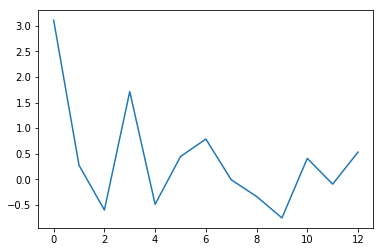

In [36]:
#tính độ lỗi 
y_predict = validating_att.dot(w)
error = np.abs(validating_label - y_predict).sum() / validating.shape[0]
error
plt.plot(w)

In [15]:
y_pred_test = testing_att.dot(w)
error1 =np.abs(testing_label - y_pred_test).sum() / testing.shape[0]
error1

0.06025009917332131

In [16]:
import matplotlib.pyplot as plt

0------1.5636911146439552
1------1.5417015471839792
2------1.518765534007834
3------1.4871847383514125
4------1.4583258898105935
5------1.4387576024251718
6------1.413323741575261
7------1.3808290576779108
8------1.3640527674752023
9------1.3348216745712431
10------1.3142168826464935
11------1.29970875301079
12------1.2730856301199145
13------1.2574334806789516
14------1.2346936390097747
15------1.2180910521957238
16------1.196051141214898
17------1.1755902844755546
18------1.155266476635038
19------1.1423897802461112
20------1.1246516704852891
21------1.1021831744136774
22------1.0957332418118928
23------1.0670752597171727
24------1.0599666507618464
25------1.0377632850402152
26------1.025988743725882
27------1.0174779923977817
28------0.9983527435679685
29------0.982376149463016
30------0.964398455260798
31------0.945450548263176
32------0.9384442226783251
33------0.9261918687874409
34------0.9103680140859945
35------0.9011878616913013
36------0.8881734899766021
37------0.87409037827

Text(0, 0.5, 'error')

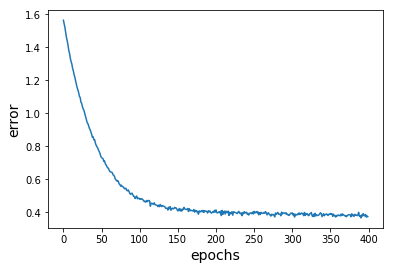

In [32]:
def train_by_gd(nepochs, lr, w = None, isgivenW = False): #isgivenW có 2 giá trị False và true, nếu true sẽ tiếp tục tính
                                                          #dựa trên lần thực hiện trước, còn False sẽ thực hiện tính từ đầu
    x,y = training_att,training_label
    if (not isgivenW):
        w = np.random.randn(13,1)
    lstloss = []
    # tính độ lỗi trên toàn bộ dữ liệu
    for epoch in range(nepochs):
        np.random.shuffle(x) #mỗi lần thực hiện phải trộn bộ dữ liệu để đảm bảo độ lỗi luôn tốt
        dw = (x.T.dot(x).dot(w)-(x.T.dot(y))) / training.shape[0] #tính giá trị hàm mất mát
        w = w - lr*dw          #cập nhật lại w với giá trị hàm mất mát vừa tìm được và learning rate
        y_predict1 = x.dot(w)  #tính y dự đoán
        error = np.abs(y - y_predict1).sum() / training.shape[0] #tính độ lỗi
        lstloss.append(error) 
        print("{}------{}".format(epoch,error)) #xuất lần lặp và độ lỗi
    return w, lstloss
w, lstloss = train_by_gd(400,0.005, w, False)
plt.plot(lstloss)
plt.xlabel('epochs',fontsize = 14)
plt.ylabel('error',fontsize = 14)

In [23]:
y_predict1 = validating_att.dot(w)
error = np.abs(validating_label - y_predict1).sum() / validating.shape[0]
error

0.3099007893993429

In [24]:
y_predict1 = testing_att.dot(w)
error = np.abs(testing_label - y_predict1).sum()/ testing.shape[0]
error

0.2660458664164204

0------18.17559800515088
0------18.1636409255178
0------18.154407421654234
0------18.143014674260186
0------18.136766498599073
0------18.127393657017873
0------18.116492930095852
0------18.110684871377288
0------18.099868398928116
0------18.092781663076472
0------18.087143597208517
0------18.076447130872463
0------18.06986591402052
0------18.05883680475587
0------18.048652600664923
0------18.043320445537596
0------18.036628798890302
0------18.02345703614735
0------18.013368070030165
0------18.0075594261956
0------18.00096699303868
0------17.995099681463948
0------17.988552498115695
0------17.98112297429301
0------17.970999477570956
0------17.96464294630399
0------17.95922479599801
0------17.949129677116517
0------17.943521270465652
0------17.936797295389876
0------17.925441922202964
0------17.91854085980215
0------17.90603875136615
0------17.8993739475274
0------17.894190267504673
0------17.88305362250769
0------17.877317472085526
0------17.86794717407914
0------17.861749637597004
0---

1------13.979236474991527
1------13.974409648849036
1------13.968629109255115
1------13.962911902504757
1------13.958679927841935
1------13.954029017874912
1------13.949630430433025
1------13.944596467615053
1------13.940682778990753
1------13.935353969183069
1------13.931702795238772
1------13.9278296098668
1------13.921312763230222
1------13.913810791546336
1------13.90889826743462
1------13.901595152161605
1------13.893811225984319
1------13.889977976679136
1------13.883280902663417
1------13.874386450280051
1------13.865258781315132
1------13.858074034723913
1------13.854082346633025
1------13.845348959224761
1------13.841909610029964
1------13.833529678556932
1------13.82914747919317
1------13.824637877748946
1------13.816186087759032
1------13.808757240116798
1------13.804865745788533
1------13.795192986785825
1------13.787078192785367
1------13.78150527243091
1------13.776842535150626
1------13.770794980558193
1------13.766629371867538
1------13.761567679739562
1------13.7580389

3------10.742642413887511
3------10.740017307812268
3------10.737827294956574
3------10.734144003754924
3------10.73218784408138
3------10.73012902801961
3------10.72315885008088
3------10.718043354503507
3------10.714964732659599
3------10.712278126050842
3------10.709194219051325
3------10.707088789251511
3------10.704408880552375
3------10.70192973895145
3------10.698167299911361
3------10.69543869629103
3------10.692944289445542
3------10.690717858361031
3------10.685418581135007
3------10.683466011537668
3------10.678302404336314
3------10.676015435946427
3------10.672433084467414
3------10.669936632249433
3------10.665867809640247
3------10.662457409974461
3------10.656536864675338
3------10.654152650605383
3------10.649623913521634
3------10.64663769156621
3------10.642068935599465
3------10.639285366129664
3------10.636668824000747
3------10.631100107481213
3------10.628093574216454
3------10.625668723592575
3------10.623423736360488
3------10.617524372157982
3------10.61492189

4------8.940670492337125
4------8.937226780829253
4------8.934110164813157
4------8.933090472821112
4------8.929542444275313
4------8.926409861799717
4------8.924067898385122
4------8.919771337731602
4------8.91841387920769
4------8.914620525734378
4------8.912316479876033
4------8.910181067714237
4------8.906525307863987
4------8.904305795426023
4------8.900729053656782
4------8.899198968107594
4------8.897606325642382
4------8.895800266815495
4------8.892223643255551
4------8.891158527258447
4------8.889819856592705
4------8.888359442925028
4------8.88704523141361
4------8.884632287695144
4------8.883262758107055
4------8.880004908273465
4------8.877760829107599
4------8.874280174057262
4------8.872924689199175
4------8.871593479796884
4------8.868194523199572
4------8.86658015521873
4------8.86523403679208
4------8.86412322759037
4------8.86313691375031
4------8.861988500120976
4------8.859671587477923
4------8.858581739703425
4------8.854779329495303
4------8.853374871742595
4-----

6------7.830555806074464
6------7.828449854181909
6------7.8263452273248
6------7.825960280107037
6------7.825606331782737
6------7.824795698374663
6------7.824432921736048
6------7.823283859244991
6------7.822937524598768
6------7.820885823768191
6------7.820176542636768
6------7.818215415131833
6------7.816453368531303
6------7.8160011570355294
6------7.815447534865804
6------7.8134013269578695
6------7.812526461218963
6------7.811937368719289
6------7.809593894443921
6------7.808733914792516
6------7.806503243428056
6------7.803436312865473
6------7.802929769641858
6------7.801529061456554
6------7.800707789894317
6------7.799952183602385
6------7.798445666227137
6------7.797853516771108
6------7.797142491984823
6------7.795431705978494
6------7.794935292384323
6------7.7945154147248585
6------7.7927084354894545
6------7.792358894288518
6------7.791134780782032
6------7.789789361873759
6------7.7890455202160975
6------7.788095196027799
6------7.7861583716440625
6------7.785703644191

7------7.407438651574833
7------7.406902228214154
7------7.4065918266535595
7------7.405155379548768
7------7.404505271709511
7------7.403185282034874
7------7.401452725432662
7------7.4012241164618935
7------7.399726551370782
7------7.39850655346339
7------7.398064024267014
7------7.397842249994015
7------7.396218654268843
7------7.394971177243668
7------7.3925540477327925
7------7.39221371342344
7------7.391976127804188
7------7.390658527984519
7------7.389607987654231
7------7.389206512892145
7------7.388106030943167
7------7.387293602251479
7------7.385955011121288
7------7.385418639372028
7------7.384769740716126
7------7.383377381150382
7------7.383081409415921
7------7.382624832272186
7------7.381207780396813
7------7.380749100458699
7------7.380142404262697
7------7.379981256986457
7------7.379478312169623
7------7.379301430349188
7------7.377340004156379
7------7.3771625481248835
7------7.376944314070548
7------7.376681182988603
7------7.376609289086336
7------7.37394801477506

9------6.940265778095959
9------6.939664002092362
9------6.938879852056624
9------6.9383311869100694
9------6.937739844403993
9------6.937584794921178
9------6.937081127174432
9------6.936964588900016
9------6.936760099881565
9------6.936576524355814
9------6.935002484313672
9------6.93487946340977
9------6.9346968219885285
9------6.933152610246158
9------6.932515431038905
9------6.932402040710101
9------6.932387348063655
9------6.931747333288728
9------6.930828281583593
9------6.930842561170791
9------6.930759542348475
9------6.930329902923617
9------6.930073773776705
9------6.928457124526088
9------6.927934769313366
9------6.927487908086446
9------6.927442861083009
9------6.927225911238368
9------6.926627017264253
9------6.925326273040839
9------6.925484473176946
9------6.925166324958566
9------6.925260652467862
9------6.924717805538689
9------6.924053218058942
9------6.923950980686577
9------6.923812868975588
9------6.922331690423241
9------6.922382693616889
9------6.922537122804789

10------6.759754629889727
10------6.759538349336111
10------6.75947481224762
10------6.75909459904927
10------6.757385546104421
10------6.7569476361910095
10------6.756063511643687
10------6.755993911943755
10------6.755403389028765
10------6.7551911700192235
10------6.755256546693579
10------6.755296696284748
10------6.754234467424836
10------6.7540747105222065
10------6.754221919788286
10------6.754253841173056
10------6.7542437810237885
10------6.753046095695473
10------6.752731085153544
10------6.752668135927387
10------6.752609244444924
10------6.752373068602835
10------6.752388104510619
10------6.7524748147482425
10------6.752435558295875
10------6.751747255009292
10------6.751304477590393
10------6.750982162791406
10------6.750867119597719
10------6.750505092408676
10------6.750367271103439
10------6.750130649809485
10------6.749715088891257
10------6.749666420846544
10------6.749139386942252
10------6.748880803133443
10------6.748410107766252
10------6.748368321023814
10------6

12------6.5272233268093744
12------6.527251008439313
12------6.527230580001238
12------6.52606118263871
12------6.526170267828696
12------6.525940616753163
12------6.526043628712122
12------6.526255104588359
12------6.526399440754756
12------6.526468230428478
12------6.5260481977331395
12------6.526056529558649
12------6.525914726664509
12------6.525981653578404
12------6.525857229344061
12------6.524705039963452
12------6.524744924612162
12------6.524938914386988
12------6.525025595461128
12------6.525147073479743
12------6.52507823389415
12------6.5246823708433626
12------6.524646940562219
12------6.524089504378859
12------6.524009132548203
12------6.524003444273476
12------6.524127980575128
12------6.523817550945809
12------6.524023458601102
12------6.522734712116618
12------6.5228610368377495
12------6.5229182308663995
12------6.521679467480659
12------6.521450768113893
12------6.521353626579475
12------6.521465242576671
12------6.521496606935412
12------6.521500268786573
12------6

13------6.440857409786216
13------6.440910371823798
13------6.440670979793888
13------6.440832956948181
13------6.439882263106976
13------6.439878977387671
13------6.440050597156756
13------6.43990058003542
13------6.440039467653817
13------6.44011917775463
13------6.440103025939633
13------6.439115491334112
13------6.439076273804008
13------6.437849133557728
13------6.43759141818935
13------6.436068117168984
13------6.435989632784957
13------6.434729908743149
13------6.433649165452405
13------6.433789683950053
13------6.433014408674592
13------6.433108927715326
13------6.433059084688788
13------6.433220437282376
13------6.432867130944336
13------6.432725072102834
13------6.432598646492427
13------6.432785548759325
13------6.432714307110616
13------6.43240980894758
13------6.432438689982834
13------6.432279541476721
13------6.4321702398122245
13------6.432070656031926
13------6.4321714300317625
13------6.4321588902660105
13------6.431840514957596
13------6.43198884188594
13------6.4306

15------6.341858307861025
15------6.342039303370097
15------6.342115293965651
15------6.341925544052507
15------6.342010459270114
15------6.34219488134948
15------6.342019624930344
15------6.342163231699654
15------6.341116917460353
15------6.341127320862955
15------6.341109584054117
15------6.339915304169088
15------6.339705304270574
15------6.338892783344752
15------6.3389347340574185
15------6.338731433939292
15------6.338779545115201
15------6.33894764483801
15------6.33894557198887
15------6.338721947876639
15------6.337904864788471
15------6.338002489587068
15------6.337715433606313
15------6.337921861057796
15------6.338141565287885
15------6.338108371952895
15------6.338034279564994
15------6.338117082375686
15------6.338073125574835
15------6.337789311763518
15------6.337977444062737
15------6.338073069134617
15------6.338002976936211
15------6.337962887636645
15------6.338126488606745
15------6.338035436231929
15------6.337156618018228
15------6.337246221993445
15------6.3373

16------6.270705716285175
16------6.2707318013185755
16------6.270899698720993
16------6.270954359122997
16------6.270929341390469
16------6.2708407946488425
16------6.270742210448996
16------6.2707898588424085
16------6.270872755576831
16------6.269852587782642
16------6.269586249814654
16------6.269648191106265
16------6.269488243756422
16------6.269596474438064
16------6.2699226167500015
16------6.269421028159283
16------6.26928671129453
16------6.269350850580779
16------6.2695808940832505
16------6.269577046534806
16------6.269472701588214
16------6.2695838180346835
16------6.26960210920463
16------6.268189537910669
16------6.268420183063405
16------6.268118409488782
16------6.267987383492399
16------6.267900140278373
16------6.268002027477392
16------6.268165594081754
16------6.268196255128347
16------6.2684303555015415
16------6.268466542296544
16------6.268462504725685
16------6.268201028797428
16------6.268250118800401
16------6.268143556963654
16------6.268104953720146
16-----

18------6.211903292806935
18------6.212076736410578
18------6.211824438693488
18------6.2118041634936
18------6.211912188402906
18------6.211977571184263
18------6.211062445152083
18------6.211070960670411
18------6.211211867070472
18------6.210316018008382
18------6.210560905115194
18------6.210558426906294
18------6.210863218052369
18------6.210559570503797
18------6.210807141319421
18------6.210711281133955
18------6.210695861114343
18------6.210802824563133
18------6.209702814282512
18------6.209606747522705
18------6.209509435110177
18------6.209693759300308
18------6.209455821292144
18------6.209546187194978
18------6.208865962649577
18------6.208914759636808
18------6.208952768920855
18------6.208900265739302
18------6.208674204585827
18------6.208880053242571
18------6.209091360553006
18------6.208981381131665
18------6.208931936162319
18------6.208986146540788
18------6.208888093289297
18------6.207871347756935
18------6.207865363883583
18------6.20777876853102
18------6.20783

19------6.120304891304185
19------6.120255195183485
19------6.12006553758183
19------6.118889990312746
19------6.119069066493284
19------6.119039819857163
19------6.118908372172826
19------6.118194866856354
19------6.118162776849883
19------6.118313422045465
19------6.118257738943373
19------6.117275370538059
19------6.117270320046056
19------6.11730988233056
19------6.1172470776796635
19------6.117079664248444
19------6.117203467405683
19------6.117199040499246
19------6.11745014942916
19------6.1176517577829825
19------6.117896924544223
19------6.116862227182932
19------6.116834789995366
19------6.116708160564118
19------6.115644368123485
19------6.115479029939218
19------6.115280090080556
19------6.114595791074033
19------6.113912602775099
19------6.113168549871189
19------6.113154851752879
19------6.112325347014191
19------6.112422858173125
19------6.112471181482416
19------6.112690656085695
19------6.112635145286711
19------6.112671985004517
19------6.111866455616656
19------6.111

21------6.060872347940117
21------6.061092566438275
21------6.061146426587035
21------6.0611770578436115
21------6.061196568305824
21------6.061212294645276
21------6.0604373289754205
21------6.060538727728749
21------6.060721994930222
21------6.060757032572072
21------6.060798813719123
21------6.06056640645389
21------6.0603616234467435
21------6.060376331009821
21------6.06046313307823
21------6.06057698510996
21------6.060622688397251
21------6.060732628683069
21------6.060832534628407
21------6.060849362429512
21------6.060891768978174
21------6.060742752044698
21------6.060765462344077
21------6.060999528438245
21------6.061005948723795
21------6.060821823421052
21------6.060828166160468
21------6.061014081385115
21------6.061038815969108
21------6.059927138731692
21------6.0600315874905375
21------6.060261165907828
21------6.059268670469156
21------6.0593905606604
21------6.059319582720521
21------6.059246072001092
21------6.059465727672502
21------6.059451895279112
21------6.059

23------6.0324489855980215
23------6.032340121222521
23------6.0322863116382734
23------6.0324960075005425
23------6.032555077659826
23------6.03255820975493
23------6.031797431314594
23------6.031799346111496
23------6.031818373179443
23------6.032044916148771
23------6.032153662273695
23------6.03229833795753
23------6.0323072015427
23------6.032457889363833
23------6.032547224760642
23------6.032492768948077
23------6.032657903680058
23------6.03265627971915
23------6.032670225386847
23------6.032461165449973
23------6.032555645372805
23------6.032487458405516
23------6.032413619032019
23------6.031563597056301
23------6.0317564512575785
23------6.0317150039391585
23------6.031624256369636
23------6.031489077200633
23------6.031531728786856
23------6.030848405621179
23------6.029918905173844
23------6.030106461799152
23------6.030089769811387
23------6.029798940731362
23------6.029835921509366
23------6.029838257962696
23------6.029954681533471
23------6.02992293465301
23------6.029

24------5.945807648190717
24------5.945832374771502
24------5.945999165603674
24------5.946101836996516
24------5.945926290252024
24------5.9460781968607925
24------5.946082920509631
24------5.945466515076428
24------5.945427249524519
24------5.945286202961172
24------5.945359702077685
24------5.945210919690286
24------5.945208202272494
24------5.945388776903172
24------5.945547792747469
24------5.945723315240037
24------5.9450059831527815
24------5.9449624733994675
24------5.945103987405354
24------5.9443442181249475
24------5.94425706421908
24------5.944267288221248
24------5.944441219888242
24------5.944300624055201
24------5.944224824709522
24------5.943418887238244
24------5.943477023215837
24------5.94352153594521
24------5.943409549999105
24------5.943271816053093
24------5.94237209274697
24------5.942497832176834
24------5.942668167078151
24------5.942849940487639
24------5.942896638075349
24------5.94288508685896
24------5.942753497470414
24------5.942948642473525
24------5.94

26------5.889372486349574
26------5.888636666168869
26------5.888594871122097
26------5.888591023520078
26------5.888789312092551
26------5.888899725377107
26------5.8890154148036755
26------5.889011547184378
26------5.88915430705509
26------5.889213790180385
26------5.889228142412864
26------5.889390577739541
26------5.889396119075816
26------5.889577568365325
26------5.888907123584017
26------5.888949301994041
26------5.8888274185390825
26------5.8887407826257325
26------5.88854975221496
26------5.888539285812297
26------5.887927313047297
26------5.888082425369864
26------5.888169434506314
26------5.888058603143205
26------5.8880433598157165
26------5.888161319485753
26------5.888329834635564
26------5.88834369515605
26------5.888296990747637
26------5.887856640461446
26------5.887934675015012
26------5.887311710470615
26------5.887323690556269
26------5.887517107970896
26------5.887671654894442
26------5.887831652857173
26------5.8879397346932905
26------5.888109459153966
26------5.

28------5.8792030968257425
28------5.878493976369424
28------5.878298472367226
28------5.878263269756687
28------5.877548522977028
28------5.877556373260719
28------5.877544614612888
28------5.8774882973536
28------5.877462730314511
28------5.877541058001442
28------5.877559135497575
28------5.877649147802458
28------5.8770772962465845
28------5.877112718521071
28------5.877231035300134
28------5.876458067797133
28------5.876419616713101
28------5.876414928955395
28------5.876536847632019
28------5.876234479175835
28------5.876321983377727
28------5.876233822428302
28------5.876279858551326
28------5.876238565157467
28------5.875679157302337
28------5.875773533737563
28------5.875846407356297
28------5.875712660903482
28------5.875837817105805
28------5.8759503107876645
28------5.875273085947097
28------5.875376292601707
28------5.875373377506128
28------5.875409757463706
28------5.875442447243383
28------5.87545960038786
28------5.875468897369488
28------5.875581315459532
28------5.87

29------5.816764216439159
29------5.81689919416863
29------5.816927902584214
29------5.816231344313737
29------5.816350065083697
29------5.816404103455743
29------5.816424682805354
29------5.816424708702281
29------5.816553451275952
29------5.8166554897177525
29------5.815942255842596
29------5.815922719857856
29------5.815335122449786
29------5.815347803379004
29------5.815336973775697
29------5.814677609033699
29------5.814694642408937
29------5.814841776588108
29------5.814867397299845
29------5.814941183251543
29------5.815035960696865
29------5.815075763217041
29------5.813687266482412
29------5.813717059687115
29------5.813732370493949
29------5.813149848561812
29------5.813301988445663
29------5.813309599205871
29------5.813355295203431
29------5.813443798593981
29------5.812860741576913
29------5.812985076338166
29------5.812740527109937
29------5.812074830733322
29------5.812145033006469
29------5.812135566901684
29------5.81224138395454
29------5.812380785017577
29------5.811

30------5.777091172656779
30------5.7764832765533525
30------5.776489582977308
30------5.776620183682425
30------5.776106237051561
30------5.776080586068823
30------5.7760818874405215
30------5.77609984511469
30------5.776085810414034
30------5.77609796747066
30------5.776085108810107
30------5.77604525897542
30------5.776128733523101
30------5.776271657994922
30------5.776225382797631
30------5.776222502563273
30------5.776206771740471
30------5.776170843958606
30------5.776207394842239
30------5.7761937965773775
30------5.776212695398296
30------5.776242779429637
30------5.776237996837381
30------5.776252681697235
30------5.776241548080195
30------5.775604608060791
30------5.775088315836655
30------5.77496925850551
30------5.774935356795464
30------5.774918085168238
30------5.7744067080708765
30------5.773827085300865
30------5.773851732704779
30------5.773859432520844
30------5.773894581000256
30------5.773813686012692
30------5.7738370249438224
30------5.773887945992605
30------5.7

32------5.746443269389415
32------5.746564517480876
32------5.74664214332128
32------5.746756188346065
32------5.746838044516187
32------5.746947992994007
32------5.747060411179597
32------5.747173899355541
32------5.747142478829902
32------5.747264615169099
32------5.747354743902549
32------5.747400611288088
32------5.747418777204941
32------5.747257240501561
32------5.747319873778334
32------5.747440314049421
32------5.747573253445573
32------5.747692794311947
32------5.7477796876524385
32------5.747406099054358
32------5.747456953973749
32------5.747025222011403
32------5.746987047857446
32------5.7470893607482
32------5.74723171621334
32------5.747287765171352
32------5.747428607831303
32------5.747399716062071
32------5.747463817194006
32------5.747387042497713
32------5.747348736836292
32------5.747412934220507
32------5.747564687932629
32------5.747580673701762
32------5.747031651270963
32------5.747057552308868
32------5.747038553082703
32------5.747027907125274
32------5.74706

33------5.729042646268983
33------5.728377944716785
33------5.728203049169244
33------5.728331587875888
33------5.72782052420722
33------5.72728682253835
33------5.727367429839048
33------5.727419886484439
33------5.727518670349051
33------5.727527765270787
33------5.72763842985367
33------5.727663722455174
33------5.727162803953681
33------5.727295874715398
33------5.727319465196662
33------5.727353533471013
33------5.72734606518945
33------5.7273596083458855
33------5.727480629269432
33------5.7274273471161115
33------5.726295456391255
33------5.726328454099603
33------5.7263464435868725
33------5.726349230808722
33------5.7249487037910765
33------5.724975177881615
33------5.725132020686872
33------5.725105811937911
33------5.725125589982925
33------5.7251471280862125
33------5.725158773431096
33------5.7252358725198125
33------5.725295630359314
33------5.725369415166032
33------5.725375709656765
33------5.725416361267624
33------5.725460580711784
33------5.725501575418406
33------5.

34------5.6749179690017515
34------5.674978108133473
34------5.6750721852983155
34------5.675260647419711
34------5.674633331204312
34------5.674586846643707
34------5.674644820109435
34------5.674605308638178
34------5.674593126443741
34------5.67471062079181
34------5.67475283142878
34------5.674805873321256
34------5.674804063448051
34------5.674843316665442
34------5.674903819913639
34------5.674927193781722
34------5.674808025649149
34------5.674898088218361
34------5.674939067997587
34------5.675075367835082
34------5.675056716223304
34------5.675128239654619
34------5.675176607207076
34------5.6747924276017345
34------5.674827093301331
34------5.674939887358404
34------5.674955768240037
34------5.674956454013569
34------5.674995734045612
34------5.675092639383324
34------5.6750805818097625
34------5.675120202761237
34------5.6751093900282825
34------5.675211149622155
34------5.675329735622784
34------5.6753577692435275
34------5.675347874053243
34------5.675507351568769
34------

35------5.66169849491147
35------5.6617426705141005
35------5.661880133434601
35------5.6619826817762
35------5.662106508638182
35------5.662166574023293
35------5.662330030278153
35------5.66235099804648
35------5.662441096620387
35------5.661858299154078
35------5.661221473160431
35------5.661248628178217
35------5.66123929943173
35------5.661271456853953
35------5.6608970692769
35------5.660928213690588
35------5.660528655286554
35------5.660686783800497
35------5.660769585291783
35------5.660776962505695
35------5.660855551498346
35------5.660731711934584
35------5.660867510553368
35------5.660878086305398
35------5.660754419947183
35------5.660301424051038
35------5.659890794836837
35------5.660032442068176
35------5.6599882971324815
35------5.659973738830663
35------5.66003077898231
35------5.660067745041585
35------5.660054494664035
35------5.659439779030043
35------5.659543858014559
35------5.659477699789427
35------5.659477811562026
35------5.659571480596893
35------5.65958911

36------5.665160874270036
36------5.665227765006088
36------5.665245443499669
36------5.665364492464518
36------5.665395959903047
36------5.665493432828039
36------5.665531554919491
36------5.665512767661123
37------5.6867091225911235
37------5.686701943962589
37------5.6867367249866545
37------5.685341824167111
37------5.685347973631088
37------5.6853747682649916
37------5.685293529797435
37------5.684914309764411
37------5.68489263365775
37------5.684807887242693
37------5.684434826603374
37------5.684477854589076
37------5.684106082689958
37------5.684138737426812
37------5.684216301330826
37------5.684262424163809
37------5.683895313023193
37------5.683920353737993
37------5.684007713589702
37------5.684007419481743
37------5.684129419075044
37------5.683724609138322
37------5.68384805469602
37------5.683954925310699
37------5.6839732630762905
37------5.684002146122226
37------5.684023005731345
37------5.684063924533942
37------5.684192897722861
37------5.6841379000165
37------5.68

37------5.673657525867667
37------5.673773111541572
37------5.673804596816502
37------5.673791017145959
37------5.6738821027733595
37------5.673525233932724
37------5.673577979705904
37------5.673560183916514
37------5.673589151001899
37------5.6735460062341785
37------5.673124961712257
37------5.673153449313574
37------5.673148323602112
37------5.672732089717302
37------5.6727831936562545
37------5.672824120406652
37------5.672913973671132
37------5.6729702409017575
37------5.673028302388511
37------5.673096505528701
38------5.651441597644157
38------5.651508783154479
38------5.651467523607241
38------5.651419238010257
38------5.651415776702102
38------5.651487883487573
38------5.651386975642889
38------5.651431331549537
38------5.6510427469600994
38------5.651012958440444
38------5.650931835051467
38------5.650837401727972
38------5.6508568499581555
38------5.650942489065007
38------5.650952876221282
38------5.650993833845788
38------5.650975357006027
38------5.65103047513242
38-----

40------5.642849430800501
40------5.64287151705643
40------5.642588347286122
40------5.642298635621308
40------5.642304973436228
40------5.642325265794276
40------5.642025347237416
40------5.64219114042612
40------5.642222351674849
40------5.64222672075327
40------5.641414604680154
40------5.641491767994774
40------5.6415224140571025
40------5.6415755749495355
40------5.64164027550727
40------5.6417247730238635
40------5.641256010867867
40------5.64130659208939
40------5.641323751267088
40------5.641311075561362
40------5.641345701961666
40------5.641323692814266
40------5.641317080515297
40------5.640959768597024
40------5.641021304916986
40------5.64102472684456
40------5.641093502549566
40------5.641147162292996
40------5.641220926674742
40------5.641265911472488
40------5.641285268936005
40------5.641305694685043
40------5.641323343091406
40------5.640988202666774
40------5.641069271513226
40------5.641182959983662
40------5.640712698965654
40------5.6408595895151725
40------5.6408

41------5.63946472799919
41------5.639481570027944
41------5.639450107176425
41------5.639478249343493
41------5.63953666289535
41------5.639466630156138
41------5.6393365625021366
41------5.639309106521174
41------5.639293945656645
41------5.639403209724678
41------5.639362181842388
41------5.639416759431566
41------5.6394542819650635
41------5.639161338783041
41------5.639143341331789
41------5.639160504247688
41------5.639220873922137
41------5.6392049355455285
41------5.63923275030977
41------5.639263650839085
41------5.639338927024911
41------5.639333240661017
41------5.63901865501176
41------5.639059691869905
41------5.6390952535921794
41------5.639124215940805
41------5.639123724073733
41------5.639112370934761
41------5.639237440270136
41------5.638902731504668
41------5.638741750079248
41------5.6387494224511
41------5.638826743949745
41------5.638857496838799
41------5.638561839777401
41------5.638557245955679
41------5.638108387552845
41------5.63815001602172
41------5.63822

42------5.631286347685251
42------5.631326097796881
42------5.631120116791697
42------5.631090083731161
42------5.631134972382989
42------5.630861417192111
42------5.63091854888146
42------5.631039739821089
42------5.631120353585003
42------5.631142325886124
42------5.630236763944974
42------5.630291002303667
42------5.630263172488997
42------5.630345551627002
42------5.630349017184976
42------5.630400026418
42------5.6304588802156585
42------5.630497909703115
42------5.630568681900482
42------5.630597887075999
42------5.630330155735916
42------5.630379487405998
42------5.630453808289839
42------5.630534411357091
42------5.63055786863899
42------5.630249102553733
42------5.630277174901813
42------5.630343983597164
42------5.630448861205002
42------5.630163761580236
42------5.630100496815446
42------5.630111338620682
42------5.630139244409324
42------5.630186498260839
42------5.62995578629752
42------5.630009221113873
42------5.630076999893111
42------5.630138288166088
42------5.6299387

44------5.59149913342125
44------5.591572722286144
44------5.59160870692256
44------5.591623750107892
44------5.59170748994681
44------5.59171190073725
44------5.591774765986445
44------5.591448276815072
44------5.591535603343082
44------5.59158900168173
44------5.591585773541648
44------5.591314058315952
44------5.591367826287483
44------5.591399612267368
44------5.591441603216246
44------5.591171448648648
44------5.591216861832756
44------5.591003928446724
44------5.591000958435394
44------5.591046168602046
44------5.5910901642805895
44------5.591127155418732
44------5.591056972155049
44------5.590899939735761
44------5.590946417342397
44------5.590734156350028
44------5.590727997059419
44------5.590760027631474
44------5.590820568087819
44------5.590853018411598
44------5.5908721413188465
44------5.590963515819596
44------5.590971308250105
44------5.590736356031032
44------5.590621146838848
44------5.590653769544609
44------5.590553792843958
44------5.590606715003725
44------5.59064

45------5.576405824865896
45------5.576422422511757
45------5.576473263006157
45------5.576542636943903
45------5.576582354854932
45------5.576633680496437
45------5.57661035675911
45------5.576412951117247
45------5.576426178237618
45------5.576487753015574
45------5.576518898859815
45------5.576593347080256
45------5.576575218746493
45------5.576634804560564
45------5.576353822503304
45------5.576386968455102
45------5.576448649646695
45------5.576363640942443
45------5.576448758868936
45------5.5764940688842435
45------5.576463061596989
45------5.576506991092064
45------5.576551385825385
45------5.5765809928469
45------5.576597175204383
45------5.576638110647164
45------5.576607398056197
45------5.576665584090033
45------5.57647241971575
45------5.576506968166868
45------5.576291604474503
45------5.576357676070272
45------5.576417621664152
45------5.576435096260209
45------5.576462629296173
45------5.5764182686546375
45------5.576464105971328
45------5.576526759222835
45------5.5765

47------5.589774335800737
47------5.589769221283437
47------5.5897868485628015
47------5.589759634504576
47------5.589771295185503
47------5.589805357411643
47------5.589864310385404
47------5.589843029370955
47------5.589882970162771
47------5.589904697377974
47------5.589882714914283
47------5.5899045292166
47------5.589927118196336
47------5.5899311167385095
47------5.589988028715176
47------5.590007990215488
47------5.590021871026583
47------5.590050063255158
47------5.59009279566495
47------5.590116151772349
47------5.590139619709335
47------5.590177930015683
47------5.589958538986456
47------5.589986676194611
47------5.589784110253429
47------5.589829002207273
47------5.589840352923508
47------5.589864911688426
47------5.589901299016042
47------5.589923586561209
47------5.5899572429241
47------5.589949515720688
47------5.5899688470984685
47------5.589992926175862
47------5.590036112111074
47------5.5898487008417534
47------5.589645948590528
47------5.589649157934506
47------5.589

48------5.575125071053906
48------5.575141002403227
48------5.575196735548697
48------5.575169548342567
48------5.57500516010199
48------5.575060157562123
48------5.5750965195817805
48------5.575130210020585
48------5.575183516734862
48------5.575219296055335
48------5.575257006021249
48------5.575281330556484
48------5.575308192211091
48------5.575337007888234
48------5.575351521722408
48------5.57532000719089
48------5.575219654407379
48------5.5752117063032705
48------5.575246242851044
48------5.575260154912191
48------5.575285273194532
48------5.57533502356275
48------5.574446167916064
48------5.574472947758551
48------5.5745456212109366
48------5.574582510421649
48------5.574561730929859
48------5.574570903555457
48------5.574591328879562
48------5.5746172582265165
48------5.574408487349743
48------5.574375678606556
48------5.5744004143708565
48------5.574460113342352
48------5.57449549258416
48------5.574301473502134
48------5.574328507554348
48------5.574432737671925
48------5.5

50------5.575109529193969
50------5.57517587905058
50------5.5751989724559685
50------5.575224346751489
50------5.575255191103646
50------5.575308367909298
50------5.5752611424333445
50------5.575285789997865
50------5.575223400335118
50------5.575231574515229
50------5.575269007410597
50------5.57528637631295
50------5.575328082910938
50------5.575215416796411
50------5.575278162836997
50------5.57533684822195
50------5.575366599857522
50------5.575206873990008
50------5.575217403537559
50------5.575225436766285
50------5.57527501632002
50------5.575231994342724
50------5.575266010517322
50------5.575296012497938
50------5.575353713765143
50------5.575366609178803
50------5.575399670401213
50------5.575440576042416
50------5.575471171258056
50------5.575482877098158
50------5.575471207293951
50------5.575495147938479
50------5.57552698221033
50------5.575573225105293
50------5.575330393424331
50------5.57534003740258
50------5.573994177432047
50------5.5740785705936
50------5.57411253

52------5.572187622424528
52------5.572178583934811
52------5.57217330625476
52------5.572173389983537
52------5.572227854217249
52------5.572250664074797
52------5.572259364739095
52------5.5722327241664384
52------5.5722741272223
52------5.5723704484586225
52------5.572386557458769
52------5.5724339653396475
52------5.572452823402545
52------5.572498504228539
52------5.572532226097465
52------5.572548236523176
52------5.572517738497817
52------5.57256139347338
52------5.57258054115467
52------5.572605559192031
52------5.572511272546774
52------5.572531779900348
52------5.572537545059236
52------5.572509513283361
52------5.572525938389067
52------5.572512068599183
52------5.5723728643496795
52------5.572293898488588
52------5.572170220859195
52------5.572200308048073
52------5.572150284997703
52------5.572085084583986
52------5.5721212435634095
52------5.571876886493679
52------5.57187689417364
52------5.5718337699124305
52------5.57053643868678
52------5.570554923950091
52------5.570

54------5.528822063777044
54------5.528850139634993
54------5.528880209485043
54------5.528914517742353
54------5.528816607733731
54------5.528834527278078
54------5.527541414815635
54------5.527555094144063
54------5.52756262249019
54------5.527606331612113
54------5.527629923343203
54------5.527670802934801
54------5.527674022478458
54------5.527637598263269
54------5.527640084437083
54------5.527632407916646
54------5.5276597008891635
54------5.52761940590744
54------5.52748943062222
54------5.527489631553604
54------5.527245899341433
54------5.5272732045958115
54------5.527216411647452
54------5.527227228101639
54------5.527248803375596
54------5.527273344574917
54------5.527302377422003
54------5.527310969840393
54------5.527339472348508
54------5.527355283798987
54------5.527356071692603
54------5.52730006478161
54------5.527318936636915
54------5.527361366957497
54------5.5272975383189324
54------5.5273141495170846
54------5.527308116571931
54------5.527282253258881
54------5.52

56------5.54360324844308
56------5.543622446431581
56------5.543645740829781
56------5.543608005242218
56------5.543557262441376
56------5.543581018890577
56------5.543511568288031
56------5.543530277735134
56------5.54350205416114
56------5.543530216407837
56------5.543554314749532
56------5.543455580230122
56------5.543472367586831
56------5.543416036141178
56------5.543459040680325
56------5.543474884325348
56------5.543505944722754
56------5.5434826462965905
56------5.543506981819426
56------5.543437991442193
56------5.54346184352436
56------5.543425566177866
56------5.543429576451292
56------5.54342406922539
56------5.5435054300853945
56------5.543463042530421
56------5.543364371623897
56------5.5433174100741045
56------5.54328317892828
56------5.54331123123625
56------5.5433304397423635
56------5.543351281188768
56------5.543372928172331
56------5.543392223916309
56------5.54339277319718
56------5.543381973248551
56------5.543303231346121
56------5.543317011514144
56------5.54330

56------5.542466501935894
56------5.542435544466627
56------5.542420500094986
56------5.542439678510757
56------5.542453666113701
56------5.542473226793794
56------5.5424811629073645
56------5.542440792010279
56------5.542435267739893
56------5.542451388883167
56------5.5424353697283015
56------5.542501740499646
56------5.542545951563554
56------5.542556453402058
56------5.5426025348801575
56------5.542667578804219
56------5.542709017079307
56------5.5427176930673046
56------5.542729598641069
56------5.542759398835924
56------5.542767955301453
56------5.54267519476376
56------5.542702511776202
56------5.542687957780416
56------5.5426658263706825
56------5.541360854448559
56------5.541254815571336
56------5.541290695391108
56------5.541310148306223
56------5.541376976792449
56------5.541384179035985
56------5.541382313418871
56------5.5413880004682134
56------5.541345268710193
56------5.541353878030329
56------5.541376795796553
56------5.541418038424923
56------5.541380534392732
56-----

58------5.541095212954655
58------5.541128859330296
58------5.541129716136516
58------5.541137226818351
58------5.541158339452446
58------5.541167472390771
58------5.541168853959717
58------5.541180715216301
58------5.541208883167578
58------5.541210752875334
58------5.541238091835445
58------5.541242156121826
58------5.5412881084689545
58------5.541237208132241
58------5.541288743756114
58------5.541304736252135
58------5.541323057042514
58------5.54135545033678
58------5.541375979615989
58------5.540103324247979
58------5.540128456093375
58------5.53926480578963
58------5.5392285105473515
58------5.539246847276432
58------5.539253798668962
58------5.53926665069647
58------5.539274296838648
58------5.539320763629332
58------5.539313967899612
58------5.539327408216267
58------5.5393960518148475
58------5.539423567664174
58------5.53942076574413
58------5.539432484406248
58------5.539455241251277
58------5.539474468444192
58------5.539499078226136
58------5.5395244850289425
58------5.53

59------5.512711668630935
59------5.512718382382703
59------5.512727164169922
59------5.512656801989932
59------5.512665756491331
59------5.512669242849992
59------5.512725490032014
59------5.512718013619365
59------5.512754015111298
59------5.512739553002563
59------5.51275393497276
59------5.512762636922295
59------5.51277049438791
59------5.5127831773403395
59------5.512704950341279
59------5.51275062938273
59------5.512752352811873
59------5.512764984482884
59------5.512787884581971
59------5.512809886624879
59------5.51284300598011
59------5.512827190732231
59------5.51278785769539
59------5.512792550169213
59------5.51279645280818
59------5.512816431267563
59------5.5128273986501615
59------5.512794547693967
59------5.512789872476904
59------5.512775190952959
59------5.5128231048207965
59------5.512710648060122
59------5.512710891531839
59------5.512714657880935
59------5.512732005423883
59------5.512742854717671
59------5.5127518599284615
59------5.5127604148748794
59------5.512

61------5.518984031335169
61------5.518981549573309
61------5.519033896970692
61------5.519051099776268
61------5.519056676594177
61------5.519067497770174
61------5.519077181479762
61------5.519094267908647
61------5.51913307779663
61------5.519146734128189
61------5.51909487054471
61------5.519115817549635
61------5.519142411809685
61------5.519171706120733
61------5.519189068126743
61------5.519192459608099
61------5.5192053735555096
61------5.51922584326503
61------5.5192398606540305
61------5.519254592077059
61------5.519269269695651
61------5.519303140472627
61------5.519219640141016
61------5.5192251263680205
61------5.519222981394192
61------5.519253456088945
61------5.519276952631045
61------5.519331383374149
61------5.519329829370399
61------5.519277466799189
61------5.519274748019076
61------5.519288870883784
61------5.519289281373807
61------5.5193154954188595
61------5.519362008068784
61------5.519397805160249
61------5.519380374155857
61------5.5194119746136785
61------5.

62------5.539966109312688
62------5.539988402369035
62------5.540004976156335
62------5.539958826122989
62------5.539935138518533
62------5.539900213950069
62------5.539847594760861
62------5.5398485855132495
62------5.539866578767323
62------5.539903548471783
62------5.539914271225871
62------5.539960917433273
62------5.539963106493077
62------5.5399336984589445
62------5.539938494066968
62------5.5399431813774855
62------5.539934794209302
62------5.53995211595513
62------5.539921363044133
62------5.539938861971441
62------5.53994456800057
62------5.539967902010415
62------5.53999114138776
62------5.54002162762899
62------5.540051729151297
62------5.540065351826105
62------5.540040678577336
62------5.540044879348791
62------5.540059535890868
62------5.5400785821967835
62------5.540116549816093
62------5.540113592579386
62------5.54012310417353
62------5.540142393543524
62------5.540153404570168
62------5.540162810810513
62------5.540061700027616
62------5.540104756961838
62------5.540

63------5.512906617998543
63------5.512914520540597
63------5.512934220869801
63------5.5129638867547595
63------5.512948592268071
63------5.512942198550495
63------5.512964070109119
63------5.513042659306763
63------5.513089050228882
63------5.513115658014538
63------5.513202781906172
63------5.513256000146171
63------5.51324871885783
63------5.513289628304132
63------5.513319052864799
63------5.513406660791034
63------5.513416844142616
63------5.5134003686836675
63------5.513382151258275
63------5.513377643322285
63------5.513387003339186
63------5.513393849455927
63------5.513356534790152
63------5.513353980592802
63------5.513354965655435
63------5.513387355091675
63------5.513383051549181
63------5.513372110971052
63------5.513326707183213
63------5.513329561776298
63------5.512482863478815
63------5.512483872955676
63------5.512511590944968
63------5.512540373006703
63------5.51255811029019
63------5.512517606455711
63------5.51255761809781
63------5.512565714539552
63------5.512

64------5.537844312454504
64------5.537812062389557
64------5.537820057340896
64------5.537765144807545
64------5.537772324941288
64------5.537740907862057
64------5.537767029232503
64------5.537751727699
64------5.537775759383015
64------5.537830005594585
64------5.537853807728238
64------5.537886551166755
64------5.537900381326804
64------5.53790664463234
64------5.537912454710085
64------5.537922271493029
64------5.537928870067138
64------5.537747366401514
64------5.5377538668375
64------5.5377819741498495
64------5.5378134673177195
64------5.537836590905718
64------5.537879149055608
64------5.537856632755661
64------5.537839896572933
64------5.537841118847356
64------5.537895186057684
64------5.53790324210837
64------5.537889186920845
64------5.537901862402932
64------5.53789517857424
64------5.537868088659779
64------5.537870074007072
64------5.537892439831237
64------5.537646512501459
64------5.5376899963311255
64------5.53771306711935
64------5.537743343650609
64------5.53781705

66------5.522531660386296
66------5.522544329848825
66------5.522579119414629
66------5.522575926610871
66------5.522600599661543
66------5.522622586950878
66------5.522637268229805
66------5.522631923606964
66------5.522619739255705
66------5.522613420413644
66------5.522650206497706
66------5.5226329330351
66------5.521797761532488
66------5.521807070683153
66------5.521805236569355
66------5.521812037351676
66------5.521822167500412
66------5.521824351937517
66------5.521832635609013
66------5.521844037848509
66------5.521853720272583
66------5.521857447785626
66------5.521886974535369
66------5.521868801914548
66------5.521857770554216
66------5.52180194819309
66------5.521813838524057
66------5.521795524030272
66------5.521795328227888
66------5.52172957581657
66------5.521714621926035
66------5.5217030195632715
66------5.521725874389012
66------5.521786744928758
66------5.521787186427531
66------5.521782193247371
66------5.521782603140045
66------5.521724669760605
66------5.52179

67------5.548425750429534
67------5.548440553377815
67------5.548419493992266
67------5.548437078646334
67------5.548454868774612
67------5.548475376516511
67------5.548490344947068
67------5.54843395300613
67------5.548458010496503
67------5.548479543884872
67------5.548498374574984
67------5.54850900877715
67------5.5485205688668
67------5.548528575883431
67------5.548512034736804
67------5.548518763542479
68------5.52044377901978
68------5.520450995086634
68------5.520462340245774
68------5.520474830238709
68------5.520412943741665
68------5.520409929868601
68------5.520433475500487
68------5.520532112397301
68------5.520528611710981
68------5.520562825535328
68------5.520579740742552
68------5.520579763806936
68------5.520615773991389
68------5.520697385817083
68------5.52060198584619
68------5.520599803086911
68------5.5205670126610435
68------5.520562583262315
68------5.520566901508758
68------5.520564756078388
68------5.520574538100259
68------5.520556239928271
68------5.5205769

69------5.522782910022118
69------5.522763734677917
69------5.522776543743579
69------5.52278007469508
69------5.522786701183749
69------5.522787200351315
69------5.5228190461548365
69------5.522834750191829
69------5.522848619555181
69------5.522873665662784
69------5.522882828988803
69------5.522892051119684
69------5.522927942521509
69------5.522916000001138
69------5.522935391799
69------5.522949805357081
69------5.522957538405211
69------5.522969209336943
69------5.522983386448675
69------5.522995781701895
69------5.523002286671681
69------5.523011261266646
69------5.5230250569081525
69------5.522978995241851
69------5.523000120011298
69------5.523021838902673
69------5.5230224677118525
69------5.522628548950063
69------5.522713546860735
69------5.522733141731396
69------5.522748176501864
69------5.52274821993301
69------5.522726419651298
69------5.522698166687367
69------5.522745101948435
69------5.5227644543411145
69------5.522863364084539
69------5.522876808845789
69------5.522

70------5.528620839126666
70------5.528633900223012
70------5.528658006527309
70------5.528644170066175
70------5.528662622453141
70------5.5286005103386255
70------5.528617232107393
70------5.528618208536234
70------5.528636989012973
70------5.52864418695805
70------5.52866886369233
70------5.52865075767385
70------5.5286333956704405
70------5.528641683661025
70------5.5286421075784515
70------5.528666326557319
70------5.528662944016985
70------5.52867760442909
70------5.528692485675301
70------5.528701455954917
70------5.528710181366466
70------5.528801974374518
70------5.528409881379671
70------5.528402395103879
70------5.52842837992235
70------5.528418766591383
70------5.528521683597374
70------5.5285557943658965
70------5.5285533568160306
70------5.528573018529579
70------5.528527486163475
70------5.528562226730088
70------5.528563920354281
70------5.528566467884111
70------5.5285599948243185
70------5.52856343263906
70------5.528553005959834
70------5.528557565391064
70------5.52

72------5.524040135739273
72------5.524026066640247
72------5.524036750396259
72------5.524054349670245
72------5.524066543071537
72------5.524068367020711
72------5.524069335001606
72------5.524075703014987
72------5.523994023301076
72------5.524018976915039
72------5.524112095289529
72------5.5241157144504
72------5.524096761627353
72------5.524096552022207
72------5.524091311825311
72------5.524139101335567
72------5.524149894492317
72------5.524139475997399
72------5.524114668905138
72------5.524147660132077
72------5.524190794559387
72------5.524193941524628
72------5.524222487812188
72------5.524217566995571
72------5.524232220285453
72------5.524259815995084
72------5.524260698125849
72------5.524216587059363
72------5.524236755540565
72------5.524253923858321
72------5.524280560404604
72------5.524288739413704
72------5.524263040002559
72------5.524252234945952
72------5.524207331970749
72------5.524225283495501
72------5.523991094878591
72------5.524012652704994
72------5.5240

73------5.525658717423886
73------5.525787793046821
73------5.525810519236888
73------5.525825228296929
73------5.525860341987111
73------5.525868429928229
73------5.5258931363408905
73------5.525922676695966
73------5.525926016762479
73------5.52592770526106
73------5.525934510275953
73------5.52594582662654
73------5.5258871569577686
73------5.5258789356661735
73------5.525196687457443
73------5.525198115352819
73------5.525214085867897
73------5.525217111252922
73------5.525253767674547
73------5.525263990999874
73------5.5252831373719715
73------5.525288928529978
73------5.525304498085196
73------5.525312908722519
73------5.525321603148115
73------5.5253135694801525
73------5.52529840210255
73------5.52533116636117
73------5.525305135627898
73------5.52530738960684
73------5.5253258027321
73------5.525336989928789
73------5.52532876917145
73------5.525350194460875
73------5.525368470561151
73------5.5253893249542
73------5.525402954820654
73------5.525421929770224
73------5.5254311

74------5.532287354072353
74------5.532244596250125
74------5.532260871763653
74------5.532402034041453
74------5.532563339431189
74------5.532582827436546
74------5.532591569349015
74------5.532566032130175
74------5.532566875089303
74------5.532576950509402
74------5.532602867673302
74------5.532592351979351
74------5.5326169900266216
74------5.532651938153967
74------5.532659598229416
74------5.532663230117871
74------5.5326766323814836
74------5.53268631020135
74------5.532716777078826
74------5.532837653319706
74------5.53301720901249
74------5.533026868463295
74------5.53306350324784
74------5.533064698763206
74------5.533099339687496
74------5.533242952838795
74------5.533263931783856
74------5.533276985157689
74------5.533287381961285
74------5.533300838984982
74------5.533317153827087
74------5.533307370784284
74------5.533290810944074
74------5.533297980249538
74------5.533288249436379
74------5.533308737212115
74------5.533314837280067
74------5.533316409415543
74------5.533

75------5.540892595183318
75------5.540909286056914
75------5.54090206231831
75------5.54089904082948
75------5.540920765662955
75------5.54094016270122
75------5.540945805599913
75------5.54095463382542
75------5.5409764807688955
75------5.540985280611323
75------5.541124852337956
75------5.541129540585979
75------5.54116537825062
75------5.541121466137222
75------5.541102110794167
75------5.541032579670031
75------5.541032561213478
75------5.5410525839918945
75------5.541048376481337
75------5.54106523287556
75------5.540260832229299
75------5.54027335895504
75------5.540419147072651
75------5.540424888212446
75------5.54042599054257
75------5.54041592005616
75------5.540431003375978
75------5.540409183479519
75------5.540137292789318
75------5.540154787102746
75------5.540171503254682
75------5.540198681094162
75------5.540229113181613
75------5.54037031428571
75------5.540360953753971
75------5.540361994293845
75------5.540359655721896
75------5.540361127071803
75------5.5403774645

76------5.52843845545414
76------5.528428841793021
76------5.528593208054885
76------5.528596520349478
76------5.528606688447198
76------5.528614366598008
76------5.528623080280408
76------5.5286414130503
76------5.528661308515089
76------5.5286549122504915
76------5.5286913834353015
76------5.528697818803032
76------5.528702789977361
76------5.528738960467635
76------5.528712085715718
76------5.528741858788639
76------5.528739577365
76------5.528746590360884
76------5.528742569188316
76------5.528728970202441
76------5.5287332448613595
76------5.528743310367145
76------5.5288995417475295
76------5.52890550837784
76------5.52890518423113
76------5.528910224607366
76------5.52891271074621
76------5.528903881344663
76------5.529083647634081
76------5.529092362911177
76------5.5290758623360166
76------5.529077339864619
76------5.529208682620855
76------5.529207541911467
76------5.529218236837917
76------5.529231237480957
76------5.529196877196704
76------5.529224740477338
76------5.529183

77------5.528994866862886
77------5.529016539331413
77------5.529167034817199
77------5.529170639960031
77------5.529173868379735
77------5.52918514664072
77------5.529192441119424
77------5.529360620971007
77------5.529363723425998
77------5.5293677041352876
77------5.529364123467222
77------5.529391209462885
77------5.52939420532472
77------5.529421504804234
77------5.529406832421908
77------5.529370432210584
77------5.529310939434402
77------5.529294221002623
77------5.529437193041177
77------5.529442963645187
77------5.529466391157511
77------5.529420667519911
77------5.5294307374635565
77------5.529346921592973
77------5.529359342557411
77------5.529358986267324
77------5.5293740923815
77------5.529384458765813
77------5.52939659378797
77------5.529345936716288
77------5.529344249787633
77------5.52934362355456
77------5.529356013065514
77------5.529375920889456
77------5.5294047853707
77------5.5294292955749
77------5.52944031252326
77------5.529398128102719
77------5.52941091817

78------5.528790595004676
78------5.528745312560971
78------5.528746125759436
78------5.528759600617571
78------5.5287611398420475
78------5.52876921785278
78------5.528775295932744
78------5.528840078925712
78------5.528810586235142
78------5.528818461346116
78------5.528827720584421
78------5.528838928821296
78------5.5288299341411715
78------5.528841442813151
78------5.528836301660662
78------5.528869830966241
78------5.528849650668336
78------5.529001449826599
78------5.529037730637075
78------5.529054762738551
78------5.529056771885525
78------5.529096334247888
78------5.529114750532602
78------5.5292607586233835
78------5.529258423784409
78------5.529181654004079
78------5.529199811299608
78------5.529233338175618
78------5.529211705060873
78------5.52917597106904
78------5.529302402738805
78------5.529298621364795
78------5.529333910651689
78------5.5293325435845295
78------5.529295025209606
78------5.52928106489625
78------5.529256013732745
78------5.529277955405417
78------5.5

79------5.537077449242654
79------5.537226996838647
79------5.53737223637426
79------5.537384152417763
79------5.537420991847519
79------5.537426676266497
79------5.537431671765106
79------5.537447772003912
79------5.537457086633885
79------5.537465751259502
79------5.5374608082252506
79------5.537491798985778
79------5.53750723774841
79------5.537511715899393
79------5.537536371625708
79------5.537504647175045
79------5.5374839086930345
79------5.537630932024316
79------5.537637231389181
79------5.537775438202761
79------5.537758232740712
79------5.53775039176687
79------5.537742284353557
79------5.537731006301833
79------5.53771157891686
79------5.537710950669122
79------5.537718545442211
79------5.53772165587385
79------5.537692315661823
79------5.537718203572502
79------5.537730426730985
79------5.537722005136744
79------5.537720869303932
79------5.537704753321374
79------5.537710856788176
79------5.537729036771124
79------5.537818921287614
79------5.537773262362866
79------5.53780

80------5.553198434614365
80------5.553204003950234
80------5.553206843828097
80------5.553242844363733
80------5.553250298486147
80------5.553262963364986
80------5.553270992871464
80------5.553275232247652
80------5.553278449537287
80------5.553276509880347
80------5.553268715425589
80------5.553266747745367
80------5.55324082927163
80------5.55325207845837
80------5.553337077014873
80------5.553363194689226
80------5.553370248903114
80------5.553375247346783
80------5.553386195782734
80------5.553408672424195
80------5.553406656728219
80------5.553419853358661
80------5.553419650788909
80------5.553437716296752
80------5.553464553351474
80------5.553419439217489
80------5.553395248643879
80------5.553552227205109
80------5.553595175976047
80------5.553601072986228
80------5.553559503770022
80------5.553563559517133
80------5.553606988145109
80------5.553643805285011
80------5.553681424375116
80------5.553820753772324
80------5.553817808480895
80------5.553819462317396
80------5.5538

82------5.544704875152387
82------5.544728600858072
82------5.5447314450467555
82------5.5447544340247665
82------5.544728802269949
82------5.544745932282446
82------5.54474707731873
82------5.544747736719569
82------5.5447368607672765
82------5.5447478401576795
82------5.54474966612373
82------5.54476310737145
82------5.544746794209333
82------5.544761661488165
82------5.544854475567108
82------5.544886100836393
82------5.544880768165761
82------5.544885833401319
82------5.5449073856349615
82------5.544907381651206
82------5.54490442173095
82------5.54491077734094
82------5.5449086363468165
82------5.5449336540968
82------5.544880637867966
82------5.544818274962845
82------5.544806497081603
82------5.544807628651253
82------5.544806492175334
82------5.54480075779428
82------5.544746369040683
82------5.544727759685243
82------5.544704681876947
82------5.544738843917815
82------5.544754129111871
82------5.544827100671
82------5.5448110913947914
82------5.544812634830936
82------5.544819

83------5.553906178822892
83------5.553913260631248
83------5.55391178711257
83------5.553914857761131
83------5.55390604620981
83------5.553170370342178
83------5.5531463433208
83------5.553157909598617
83------5.553187545299606
83------5.553186770352567
83------5.55318307502244
83------5.553203764239706
83------5.553206528154355
83------5.553216597641866
83------5.553215663352312
83------5.5533654646585795
83------5.553363186027969
83------5.553363083725533
83------5.5533517351574035
83------5.553359295049344
83------5.553343469013897
83------5.55335073979834
83------5.553493637068301
83------5.553513605418679
83------5.553530055307381
83------5.553540381486537
83------5.553520058705582
83------5.553529743159433
83------5.553670767827147
83------5.553677412123887
83------5.5536753140396415
83------5.553678272047031
83------5.553694742695476
83------5.553678175669537
83------5.553604806123146
83------5.553599947236593
83------5.553623838461114
83------5.5537642002629894
83------5.5537

85------5.557488572750311
85------5.557478223700514
85------5.557475556214634
85------5.557434976811161
85------5.557409197710169
85------5.55740326428482
85------5.557426490110839
85------5.557370179535522
85------5.557415160458198
85------5.557537932131444
85------5.557495986660784
85------5.55763775961048
85------5.55764098485779
85------5.55764861931348
85------5.557660427521344
85------5.557384662764145
85------5.5573898563551465
85------5.557398562736866
85------5.557399930286064
85------5.55740354070813
85------5.557382692427247
85------5.557395725738163
85------5.557373511296802
85------5.55737572659344
85------5.557364969620742
85------5.557399422161881
85------5.557389538851498
85------5.557360908065529
85------5.557339519194941
85------5.557446072651428
85------5.55746390825523
85------5.557474166432064
85------5.557498794198776
85------5.557543853479404
85------5.557562162207953
85------5.557586239093526
85------5.5575958140919255
85------5.557619317987136
85------5.5576242

86------5.555625820383241
86------5.555644313662014
86------5.5556389598103895
86------5.555753252719017
86------5.555738820138337
86------5.5557374366372185
86------5.555759285978584
86------5.555736952225608
86------5.555738642047855
86------5.555740860607987
86------5.555760994367617
86------5.555761874600876
86------5.555770559936982
86------5.5557785275372975
86------5.555806562585934
86------5.55579747259109
86------5.555779007827346
86------5.555857265735758
86------5.55585565987366
86------5.555882768927508
86------5.555875819381738
86------5.555874320443301
86------5.555942827706814
86------5.555930340734669
86------5.555938890904217
86------5.555943999041036
86------5.555944009453327
86------5.555934136457712
86------5.555944739898152
86------5.555923351106348
86------5.556015745977421
86------5.555952465678528
86------5.555958483104416
86------5.5559735415628495
86------5.555986298549529
86------5.555988449141646
86------5.555990109599665
86------5.55599478584868
86------5.5

88------5.5677204432312415
88------5.567727066151169
88------5.567803339673395
88------5.567861255969652
88------5.56795731796062
88------5.567961315505542
88------5.567959380888333
88------5.567970912827974
88------5.5679732994019
88------5.567981318914687
88------5.567974422185351
88------5.567978479058958
88------5.567985561007975
88------5.567995143677595
88------5.567992950203578
88------5.568045098500432
88------5.568006522296221
88------5.568006329968519
88------5.567997933117522
88------5.5680077044366065
88------5.568033037334657
88------5.5680511432223
88------5.568072990210252
88------5.568080726899678
88------5.5680194345847625
88------5.568046649327495
88------5.568054476114302
88------5.568081830094217
88------5.568107733602011
88------5.568116333677268
88------5.567045475810657
88------5.5672013789509895
88------5.567206289340983
88------5.567198393165357
88------5.5672213335824585
88------5.567234282408524
88------5.56726045317993
88------5.5672584708328055
88------5.56

90------5.56269130100804
90------5.562702359992844
90------5.562696454156325
90------5.562758202538089
90------5.562778176664955
90------5.562806478359531
90------5.562805261246884
90------5.562960936554046
90------5.562995762756593
90------5.563011395224082
90------5.563024847200256
90------5.563024297019416
90------5.5627883310985835
90------5.562788849864319
90------5.5628004492952785
90------5.562807553451554
90------5.562901649786597
90------5.562762857395995
90------5.562760377724704
90------5.562719029724349
90------5.5627222389305775
90------5.562702247250429
90------5.562836432275085
90------5.5628451083309916
90------5.562996777256431
90------5.562999601278002
90------5.563028085150122
90------5.562987399770783
90------5.563016954902275
90------5.563135447319423
90------5.563122419668984
90------5.563142761896823
90------5.563176697731971
90------5.563315607606543
90------5.563297391685641
90------5.56329760970794
90------5.563303562553938
90------5.5633451530074876
90------5

91------5.573249560931419
91------5.57325564431351
91------5.573253596943619
91------5.573387895762047
91------5.5734019775971335
91------5.573408946920523
91------5.573373411168368
91------5.573360912120063
91------5.573375219489237
91------5.573384807722426
91------5.57338546853996
91------5.573377430219094
91------5.573321571698853
91------5.5732997839271885
91------5.573381730949103
91------5.573392410707829
91------5.573385849382407
91------5.5733650158755434
91------5.573502089402681
91------5.573488176502109
91------5.573489946054531
91------5.573507636618442
91------5.573519422527397
91------5.573526873566004
91------5.573535964551582
91------5.573667728732296
91------5.573686470063341
91------5.573707177026437
91------5.573678307706421
91------5.573682538246174
91------5.57366452185126
91------5.573664087926552
91------5.573677275397223
91------5.573697175288427
91------5.573662932141525
91------5.573721572400334
91------5.5735974633320975
91------5.573627858076033
91------5.5

93------5.574793667595165
93------5.574886258944849
93------5.575006475394523
93------5.57502343190893
93------5.57512127138658
93------5.575134029303277
93------5.575146587467067
93------5.575163983770478
93------5.575174018108411
93------5.575155578857594
93------5.575159405037897
93------5.57518350147843
93------5.575189350652146
93------5.575191882931778
93------5.575338756083427
93------5.575436376510666
93------5.575452525582465
93------5.57546001711024
93------5.575476149393447
93------5.575475544849482
93------5.57548823700078
93------5.575493301961724
93------5.575507742440713
93------5.5755125907456575
93------5.575528918640865
93------5.575653749361941
93------5.575648820794024
93------5.575638040087678
93------5.5756596440126405
93------5.575670455959829
93------5.575694201258585
93------5.575665817787102
93------5.575720023559235
93------5.575672885668774
93------5.57567656070027
93------5.575680152154515
93------5.575678560330784
93------5.575356342134334
93------5.575496

95------5.579294215833991
95------5.579286384355253
95------5.579295740941797
95------5.579285901908111
95------5.579285048568866
95------5.579267273309917
95------5.57932540336863
95------5.579337024686976
95------5.57934726140356
95------5.579317542416296
95------5.579243791767235
95------5.579223561016754
95------5.579222289381631
95------5.579186083507962
95------5.579184647888333
95------5.579184212157416
95------5.579183340275429
95------5.579134860464806
95------5.579150529721907
95------5.579135474927502
95------5.57908558422629
95------5.57908613976281
95------5.5791093556768585
95------5.579123066361729
95------5.579136316785676
95------5.579135556214085
95------5.579127272644614
95------5.579130800096594
95------5.579132556985515
95------5.5791313132193014
95------5.579122699443808
95------5.579119449287472
95------5.5790641745116565
95------5.579061208693053
95------5.579055956263414
95------5.579082339250136
95------5.579092771224848
95------5.579077324006835
95------5.579

96------5.5848027380715894
96------5.584793437113995
96------5.584813439489288
96------5.584955133728408
96------5.584983024531832
96------5.585008817317345
96------5.585012616728254
96------5.585029838866161
96------5.585021284239776
96------5.585038778978355
96------5.585021920154394
96------5.585019080116814
96------5.585045328859561
96------5.585118251177303
96------5.58512131648659
96------5.585128747268723
96------5.58513419725952
96------5.585142248286827
96------5.5850882306496334
96------5.585097409270185
96------5.585117796102122
96------5.58509707440799
96------5.585074991005101
96------5.585075066892209
96------5.585077488796451
96------5.58509329155624
96------5.5850895677689785
96------5.585092357236781
96------5.585208609738034
96------5.585182335082148
96------5.585322823875193
96------5.585320167430905
96------5.585326177168769
96------5.585310146273824
96------5.585335994927263
96------5.585291345523001
96------5.585292405896418
96------5.585310687838487
96------5.585

98------5.591483993309672
98------5.591435449383682
98------5.591434195334339
98------5.591446891043238
98------5.591457236466781
98------5.591476742697017
98------5.591579738348688
98------5.59153965759679
98------5.591554687339163
98------5.591555238123838
98------5.59156279690975
98------5.591595984540427
98------5.591599914983637
98------5.591600038367156
98------5.591612953047516
98------5.591613732047985
98------5.59163366735713
98------5.591642356278082
98------5.591775860582255
98------5.591916278096454
98------5.591914443947158
98------5.591912673690579
98------5.591916447333274
98------5.5919317468949545
98------5.591933684292254
98------5.591897075901722
98------5.59189639071793
98------5.59189996169962
98------5.591922052102143
98------5.591930633099264
98------5.592049315355358
98------5.5920674679411295
98------5.592204171937269
98------5.592212876130681
98------5.592214982776782
98------5.592202043136294
98------5.592202138356992
98------5.592240386546055
98------5.59223

Text(0, 0.5, 'error')

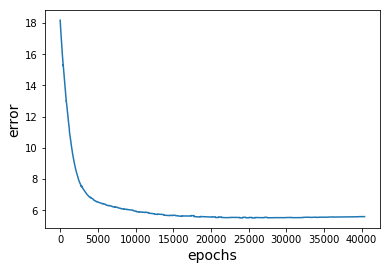

In [25]:
def stochatic_gd(nepochs,lr,w=None,isgivenW=False): #tính độ lỗi trên từng dòng dữ liệu trong mỗi lần lặp
    x,y = training_att,training_label
    if (not isgivenW):
        w = np.random.randn(13,1)
    lstloss = []
    for epoch in range(nepochs):
        np.random.shuffle(x)
        for i in range(len(x)):
            xi = x[i]
            yi = y[i]
            dw = ((xi**2)*w)-(xi*yi) / training.shape[0]
            w = w - lr*dw
            y_predict2 = x.dot(w)
            error = np.abs(y - y_predict2).sum() / training.shape[0]
            lstloss.append(error)
            print("{}------{}".format(epoch,error))
    return w, lstloss
w, lstloss = stochatic_gd(100,0.001, w, False)
plt.plot(lstloss)
plt.xlabel('epochs',fontsize = 14)
plt.ylabel('error',fontsize = 14)

In [26]:
y_predict2 = validating_att.dot(w)
error = np.abs(validating_label - y_predict2).sum() / validating.shape[0]
error

5.719733833060374

In [27]:
y_predict2 = testing_att.dot(w)
error = np.abs(testing_label - y_predict2).sum() / testing.shape[0]
error

5.801161472544888

0------40.71558006561105
0------40.35558358549382
0------39.89952171376681
0------39.48824493990825
0------39.13511996340126
0------38.715190542650404
0------38.27495099959086
0------37.92487860039098
0------37.58667314830487
0------37.27422874251359
0------36.959944838413435
0------36.654652330215484
0------36.32006899512819
0------35.98659933762085
0------35.67113252126826
0------35.35639587204185
0------35.05034968065821
0------34.73733639506141
0------34.45410989488584
0------34.18844559742415
0------33.91971826982434
0------33.64416396350093
0------33.29246188944642
0------33.030907448903385
0------32.66786179160227
0------32.380522862835086
0------32.05122415199416
0------31.80535723799554
0------31.562161472992344
0------31.291322147993547
0------31.030505150488363
0------30.722377394532568
0------30.464966981725652
0------30.150691340324105
0------29.912402702533367
0------29.668987863680595
0------29.434671700586104
0------29.151634642457324
0------28.890441738106492
0------28

9------5.82505792866241
10------5.8236620039233005
10------5.822230760073013
10------5.820991858213879
10------5.819842593632242
10------5.817707399250277
10------5.8162024641706
10------5.81459134202064
10------5.813607954623322
10------5.812353071397316
10------5.811482228021616
10------5.810390334864366
10------5.809300019177734
10------5.808273946992471
10------5.80731368914382
10------5.805951954179965
10------5.804618120509908
10------5.8027390156821435
10------5.801606594702115
10------5.800159437997548
10------5.797932645212212
10------5.796757833106319
10------5.795396253374256
10------5.794778896938446
10------5.7938202040709506
10------5.79288288052252
10------5.7911965319039185
10------5.7897783357551855
10------5.788123321225298
10------5.787116145576474
10------5.785200243496637
10------5.784112271705792
10------5.783137469671939
10------5.782449428012409
10------5.7806865922328
10------5.780014458535203
10------5.7786983975578226
10------5.776667539723316
10------5.77583

19------5.606470800236877
19------5.606533607817541
19------5.606452072066717
19------5.605603983789198
19------5.605417342699008
19------5.605628663999879
19------5.605871447048012
19------5.605855605599963
19------5.60661300593522
19------5.6065467388017405
19------5.606505273984996
19------5.606609014200885
19------5.606857679658623
19------5.606570603556145
19------5.606713259268028
19------5.606039021508763
19------5.605857996430604
19------5.60607993281383
19------5.605586617691477
19------5.605461090466108
19------5.605184013508127
19------5.605330070219405
19------5.605702110265618
19------5.60577077410388
19------5.605183621673657
19------5.604870644980154
19------5.604553573722578
19------5.60450989904785
19------5.603703163172382
19------5.603743420773508
19------5.603816994128286
19------5.604246749006101
19------5.603438724018491
19------5.603831492172966
19------5.603525118127605
19------5.602730405501054
19------5.602662811877452
19------5.602597839474183
19------5.60286

26------5.601923381797491
26------5.6018719112329665
26------5.601724037199207
26------5.602189945282774
26------5.60221219380906
26------5.6025295372326624
26------5.602154246646104
26------5.602432338872833
26------5.602028144532727
26------5.60206079229869
26------5.601857813359027
26------5.602509971856602
26------5.602742554045245
26------5.602758064130706
26------5.6021168888405795
26------5.602663368100198
26------5.603206401873404
26------5.603241186880766
26------5.603428122027877
26------5.603803004513541
26------5.603918900309171
26------5.604343516143532
26------5.604178888662071
26------5.603353412926008
26------5.603408313209076
26------5.6038990804796205
26------5.60422011522818
26------5.6043018468591175
26------5.603929279012993
26------5.603652995744579
26------5.603003451200189
26------5.603117326050864
26------5.6026468541459495
26------5.602915127393308
26------5.602870729129311
26------5.602944289726982
26------5.602857366264495
26------5.602933264334571
26------5

34------5.606054927651523
34------5.605966271779812
34------5.606245572498782
34------5.606137933795864
34------5.605276642784255
34------5.605178882606406
34------5.605752891832517
34------5.606148101205487
34------5.606226017969355
34------5.606773412903952
34------5.606960591312289
34------5.607008982201374
34------5.607086652914093
34------5.607293843297299
34------5.607056683679259
34------5.606922826475482
34------5.606167067583883
34------5.605906669570666
34------5.606066063900468
34------5.60554147081211
34------5.605449693042201
34------5.6050822535173195
34------5.605341328135229
34------5.6054237146817645
34------5.605526341944469
34------5.604883794974823
34------5.604635504287827
34------5.6043631836269325
34------5.604327381471235
34------5.603850873090906
34------5.603699472813535
34------5.603547067748379
34------5.604074326516375
34------5.603259978991356
34------5.603645166594423
34------5.603362441366274
34------5.602649184769554
34------5.602532252749546
34------5.

41------5.60554482192367
41------5.605517374449161
41------5.605598846422528
41------5.605772394818678
41------5.604908195246004
41------5.604722180492167
41------5.604912524622887
41------5.605112686776398
41------5.605021154960395
41------5.60567995314411
41------5.605881000773108
41------5.605908554697768
41------5.605897100439107
41------5.605896355665722
41------5.605741470065072
41------5.605599961719413
41------5.6050062931933935
41------5.6048227734778635
41------5.60509607319236
41------5.604835156059718
41------5.604745813194483
41------5.604524959302584
41------5.6047901599149395
41------5.605085426318469
41------5.60512710293645
41------5.604583216474946
41------5.604450706699145
41------5.604109612573083
41------5.604140320812689
41------5.603290639917536
41------5.60314307677726
41------5.603058060455026
41------5.6035780231584535
41------5.6027728071388125
41------5.603198508603339
41------5.602866292023923
41------5.602217011480151
41------5.602281943555137
41------5.60

44------5.603923991288234
44------5.60426508529221
44------5.60346067493297
44------5.6036936863066655
44------5.603981877796332
44------5.603817985667484
44------5.604520858805639
44------5.604881519936422
44------5.604803773253594
44------5.604523752410193
44------5.604546527938423
44------5.60484798685139
44------5.60526618201796
44------5.605332595963074
44------5.605121320249058
44------5.60501799143105
44------5.60513218753412
44------5.604902348003332
44------5.6048703559557485
44------5.6047363715235665
44------5.605148267108246
44------5.605033331843249
44------5.605327128680612
44------5.605413339907765
44------5.605552886003349
44------5.60532861658132
44------5.6053151542397135
45------5.605430695356486
45------5.6053691245882655
45------5.605712044993259
45------5.605734758004858
45------5.604931109455811
45------5.6049438284470865
45------5.605392056132992
45------5.605616465519744
45------5.60554100120305
45------5.60615280290135
45------5.60610191402369
45------5.606096

50------5.6063537346094146
50------5.606199294221604
50------5.606068163111802
50------5.606014381092021
50------5.605354588530598
50------5.605257121456787
50------5.6051470244307255
50------5.605642903138716
50------5.604780302595091
50------5.604848910039488
50------5.6048020014392455
50------5.603998122875415
50------5.603870135710979
50------5.603974267910108
50------5.604415606567466
50------5.604644326334977
50------5.604540765375887
50------5.604649768019011
50------5.604676384658613
50------5.6047705903155345
50------5.60472682240381
50------5.604300262611997
50------5.60419967239109
50------5.603798830440503
50------5.603831734002194
50------5.603520427546457
50------5.604226211485177
50------5.604420403605451
50------5.604112148949471
50------5.603491140029996
50------5.603652292533168
50------5.603821843984014
50------5.603871106349448
50------5.604121923727215
50------5.604506086606505
50------5.604720876600639
50------5.605348598535948
50------5.605214818302989
50------5.

56------5.604405302288663
56------5.60379389931021
56------5.603850459761383
56------5.603530767421228
56------5.603483858700826
56------5.60345030171078
56------5.603861890985093
56------5.603769173291271
56------5.60413534117365
56------5.603347461176839
56------5.603637707597502
56------5.604233590891642
56------5.60405470735028
56------5.604528486211898
56------5.604832671661697
56------5.604906648894665
56------5.604561048636888
56------5.604593957182698
56------5.604605609879319
56------5.6051758271268035
56------5.605251648650168
56------5.605005430401278
56------5.6048640108001635
56------5.60514904982498
56------5.604972018581852
56------5.605326708405077
56------5.605456382192794
56------5.605567727513154
56------5.6054537912628115
56------5.605549552804782
56------5.605922164228589
56------5.606051471008213
56------5.605997100983748
56------5.606070015758493
56------5.606347198242209
56------5.606260268023814
56------5.606779537031422
56------5.607091233328139
56------5.6075

62------5.609093282257319
62------5.608985372229386
62------5.609015607269334
62------5.6089182281764325
62------5.6081887049750225
62------5.607945628165892
62------5.608098828212308
62------5.6082521073198865
62------5.608310535934039
62------5.608897639235559
62------5.608819035591877
62------5.6087691997943505
62------5.608974027543102
62------5.608946640402897
62------5.608737048853354
62------5.608534670876535
62------5.607685538559071
62------5.607529973958607
62------5.607578135627035
62------5.60704246708776
62------5.6073569684296585
62------5.606987242314892
62------5.607462343418032
62------5.607612287134636
62------5.60771385312517
62------5.607082941263761
62------5.606733448582775
62------5.606488415397718
62------5.606466769238948
62------5.605944503808267
62------5.605810738006885
62------5.605854066781933
62------5.606106608586002
62------5.605437758191757
62------5.605475098015102
62------5.605411307846335
62------5.604569854053366
62------5.604714161998737
62------5

67------5.609818504923867
67------5.60954455090982
67------5.609449742214833
67------5.608724366574851
67------5.608795594416364
67------5.609014712516125
67------5.608474577398324
67------5.608312159259723
67------5.607907410388159
67------5.608035758072399
67------5.608277813358327
67------5.6084174235839095
67------5.607976459977417
67------5.607640166127189
67------5.607568117125857
67------5.607507430510451
67------5.6068430923248505
67------5.606689888511284
67------5.606562794568707
67------5.606900700337178
67------5.606241653396137
67------5.606724815527405
67------5.606380617545471
67------5.60574312888942
67------5.60586873599198
67------5.605947946399731
67------5.606243820847891
67------5.606355790192421
67------5.606160351354178
67------5.606205464586267
67------5.606480686100048
67------5.606425743826279
67------5.606693030995463
67------5.606266465745064
67------5.606370837111556
67------5.6060584578565225
67------5.606044609730351
67------5.605762145437245
67------5.60

72------5.60448727170122
72------5.604396181969445
72------5.604675638882728
72------5.604856614747743
72------5.604966113417271
72------5.604961801831687
72------5.605060042126642
72------5.60523231696352
72------5.605542818599358
72------5.605094602359667
72------5.605045073903534
72------5.604825592236125
72------5.60490508752369
72------5.604619925698615
72------5.60493464194059
72------5.604978098445796
72------5.604659179535463
72------5.604156553616615
72------5.604307012417113
72------5.6048100731083395
72------5.604852761605419
72------5.6051013897980315
72------5.6054138086070635
72------5.605710032485925
72------5.605885505116585
72------5.60597025727885
72------5.605127469571047
72------5.605324239883648
72------5.605497522992619
72------5.606011381563108
72------5.606010031925557
72------5.605686027504333
72------5.605417877620323
72------5.604651943732389
72------5.604778939161413
72------5.604333563493212
72------5.604251843393318
72------5.604240895387986
72------5.6048

77------5.602697910599145
77------5.602653273172888
77------5.602272080705505
77------5.602221490638377
77------5.602222708418208
77------5.602792417199321
77------5.602932715285787
77------5.602822445364553
77------5.602226580993021
77------5.602338993573498
77------5.60292337721277
77------5.602927399977688
77------5.603149864397588
77------5.603265560498859
77------5.603367361098312
77------5.603850784761911
77------5.604059578834239
77------5.603268492050708
77------5.603501456392026
77------5.603954005484904
77------5.604236890824815
77------5.604417961438117
77------5.604067616959967
77------5.604076130338238
77------5.603433798162656
77------5.603500633122174
77------5.603277106403087
77------5.6033756760401365
77------5.603614437581414
77------5.603717385560915
77------5.603615876777734
77------5.60378995875003
77------5.603011806601033
77------5.603524936148836
77------5.604113303365332
77------5.604127146331426
77------5.604435572512443
77------5.604727000556743
77------5.604

82------5.602228974134047
82------5.602787249231076
82------5.6031294099680435
82------5.602867582963738
82------5.603144575314184
82------5.603572248059239
82------5.603600034276599
82------5.603299634040901
82------5.60335906573569
82------5.603424528080976
82------5.604048506993297
82------5.604176746353235
82------5.604029578882319
82------5.603676358922954
82------5.604196318824271
82------5.604194199020912
82------5.6044093284567635
82------5.6042786433100265
82------5.604481679348241
82------5.604331692644732
82------5.604436169059906
82------5.604799861471917
82------5.605251105884227
82------5.605024572978206
82------5.605165310885788
82------5.605183187563846
82------5.605161837728318
82------5.605284666481634
82------5.605579321557586
82------5.605847486432821
82------5.605606325793298
82------5.605920284351878
82------5.6058197754231145
82------5.60575594769882
82------5.605646945879497
82------5.6059562275363755
82------5.605964908363324
82------5.606272694505833
82------5

87------5.60293700558229
87------5.602651861973239
87------5.602672535917456
87------5.60241780706597
87------5.602823799911944
87------5.602861800597384
87------5.60289256227329
87------5.60222118064253
87------5.602520922426239
87------5.602794711545756
87------5.6027790966278745
87------5.602980818854545
87------5.603108743262514
87------5.603676270158783
87------5.603880622037205
87------5.60397488145782
87------5.603325803956792
87------5.603503699321168
87------5.604021209724885
87------5.604210540512111
87------5.604295334041045
87------5.603986580275563
87------5.604032569966758
87------5.6032340278749135
87------5.603244091400466
87------5.602822271669545
87------5.602949525165117
87------5.602993433897452
87------5.60344506918443
87------5.603684046579629
87------5.6037733507397745
87------5.603029295737133
87------5.603305133562118
87------5.603646286799478
87------5.603375506884862
87------5.603875880236672
87------5.604227450565228
87------5.604551386023298
87------5.60420

92------5.603168644742538
92------5.603795583227419
92------5.60391544885985
92------5.6039744639538025
92------5.603354037259619
92------5.603588956488832
92------5.603851159265868
92------5.604102455012859
92------5.604585915608089
92------5.604907406928343
92------5.604976097356081
92------5.60521127168978
92------5.6051155108247155
92------5.604414389479883
92------5.604364362518436
92------5.604730617938503
92------5.6048244731341175
92------5.604809648825174
92------5.604423401764507
92------5.604132108168537
92------5.603516057564219
92------5.603591376640074
92------5.60317340606303
92------5.603424272955046
92------5.6034667058425605
92------5.603758745408177
92------5.603751049976043
92------5.604189004301057
92------5.603429994041318
92------5.604026041653441
92------5.60425173695728
92------5.604059570566225
92------5.604298915272785
92------5.604743460419051
92------5.60468574087304
92------5.604539110652368
92------5.6044977367587085
92------5.604592625990328
92------5.60

97------5.606474669611825
97------5.606374979795765
97------5.606475598153531
97------5.606682019980565
97------5.605871100645882
97------5.60584848485
97------5.606249194036452
97------5.606363680975817
97------5.606218469428578
97------5.606544812754604
97------5.606877222495117
97------5.606888705225563
97------5.606985596002036
97------5.6070480423695965
97------5.6069211762966615
97------5.606791083010631
97------5.606041466885997
97------5.6059214846304855
97------5.605979488369145
97------5.605543161667833
97------5.605626178735511
97------5.605258296581847
97------5.605540538045994
97------5.6057708200425065
97------5.605835148702837
97------5.6052836221077555
97------5.604911818973585
97------5.604768316917385
97------5.604877155739739
97------5.604138559896606
97------5.604057400281867
97------5.6039645035249315
97------5.604261077637488
97------5.603433229360619
97------5.603552200979027
97------5.603540300703189
97------5.6026983166686435
97------5.602874471353946
97------5

101------5.604468629335244
101------5.6049060085317395
101------5.605166384860275
101------5.605271135514433
101------5.604866523854638
101------5.605140194633408
101------5.605178599143652
101------5.60574462346925
101------5.605796183909449
101------5.605518810691041
101------5.6051350831079905
101------5.605469882649855
101------5.605562949246217
101------5.6055328477226265
101------5.6056981492828175
101------5.605944579832695
101------5.6058929961988175
101------5.606168457670028
101------5.606515505247847
101------5.606874934200232
101------5.606818786512694
101------5.607081709292263
101------5.6071204138634245
101------5.607146024556472
101------5.6072708634144215
101------5.607201963259268
101------5.607857808203159
101------5.608041806129705
101------5.6080985320060455
101------5.6080757981176
101------5.607990414989715
101------5.607747952869069
101------5.607875365363595
101------5.60772552383196
101------5.608103588933138
101------5.607723976736706
101------5.6081213958134

105------5.608207853005149
105------5.607522732469081
105------5.607128192009576
105------5.606590433972608
105------5.6067859690818675
105------5.606528327784501
105------5.606121764670273
105------5.605851141380712
105------5.60609957682971
105------5.606060669722125
105------5.60592883939744
105------5.606406406868949
105------5.606490466070252
105------5.606754298460617
105------5.606292982853632
105------5.606561259808767
105------5.606551823988187
105------5.606445524416424
105------5.606323168828191
105------5.606894201429443
105------5.60623758044227
105------5.60657494803616
105------5.606416716122483
105------5.606555370589993
105------5.606466187816442
105------5.6064651220200235
105------5.606768079205961
105------5.6067933013960305
105------5.606872259559972
105------5.607000668243871
105------5.606395885984838
106------5.606459469921843
106------5.606340443137834
106------5.606613822788394
106------5.606860486285107
106------5.606035379527357
106------5.606008349215876
10

110------5.605107815703904
110------5.605503285849431
110------5.6047639065903505
110------5.604807373626315
110------5.604526301233856
110------5.6037507028851055
110------5.6037414373145245
110------5.603624762076502
110------5.603817147353498
110------5.604071978047905
110------5.6039570606461995
110------5.603964917856868
110------5.6043222711851595
110------5.604312104993549
110------5.604285393154736
110------5.604058064481361
110------5.604243346101319
110------5.6040710952172255
110------5.60426705570292
110------5.604217781153087
110------5.604569047523031
110------5.604785592929046
110------5.6045031359431565
110------5.604049050824033
110------5.604180639380002
110------5.604678443008138
110------5.604658454832516
110------5.60482864879273
110------5.605034869060579
110------5.605121632611153
110------5.605656902008432
110------5.605550441147974
110------5.604715210326864
110------5.604692138122721
110------5.6048187060109225
110------5.605126149905008
110------5.60522080418

114------5.606983255692863
114------5.606931434660008
114------5.607169208048921
114------5.606739129796058
114------5.606755971825651
114------5.606505564149959
114------5.6067432211951544
114------5.606838681563954
114------5.606957525479799
114------5.606333494163439
114------5.606007060994116
114------5.605917129173918
114------5.605842005861287
114------5.605152966220001
114------5.6051710427186
114------5.605109164564061
114------5.605492822209754
114------5.604814616968654
114------5.605381450861685
114------5.6050914284453865
114------5.604256424814144
114------5.6043200453700255
114------5.604267131215346
114------5.604510808179106
114------5.604795091381684
114------5.604841968519994
114------5.604897867200815
114------5.605211951586589
114------5.605131830222979
114------5.605144418104602
114------5.6046857491849265
114------5.604941470617102
114------5.604515414474536
114------5.604768326887396
114------5.604651647742561
114------5.6053417749309
114------5.605427778866497
1

118------5.602889227015486
118------5.603133261375295
118------5.603630306871557
118------5.603786257456821
118------5.603936277981604
118------5.604104279995514
118------5.604207473389894
118------5.604632780799202
118------5.604761433825661
118------5.604012119175128
118------5.603981176471441
118------5.604164745494148
118------5.604315656389056
118------5.604859131180556
118------5.604426805162585
118------5.604155906616635
118------5.60331313325641
118------5.603382324455949
118------5.603020391159572
118------5.603293073648368
118------5.603306949005144
118------5.603742540214271
118------5.603651703658052
118------5.603766732245654
118------5.6029663945137305
118------5.6032235378846575
118------5.603583105952216
118------5.603483606914302
118------5.603755515977893
118------5.604211685741778
118------5.604229556666858
118------5.604162792232641
118------5.604214000523956
118------5.6044670625837485
118------5.605206737593415
118------5.605560229051943
118------5.605301408712362

122------5.604247081440213
122------5.604871770378064
122------5.60414004918861
122------5.604550402976861
122------5.605268020218226
122------5.605034662214062
122------5.6055355157320585
122------5.605841663833823
122------5.605756291612701
122------5.605467374431528
122------5.605698171668598
122------5.6056937974286045
122------5.606416622740723
122------5.606467628006828
122------5.606245343105622
122------5.606123915286036
122------5.60615173833642
122------5.605919139855393
122------5.605934283883201
122------5.606082320881292
122------5.606283058567971
122------5.606255051262144
122------5.6064132604072405
122------5.6064375156685635
122------5.60659692824627
122------5.606510094638224
122------5.6066502177501
122------5.606936212527318
122------5.606816764466363
122------5.607174124075473
122------5.607144174148903
122------5.607364497634341
122------5.607090757600654
122------5.6070640789232495
122------5.607223200013041
122------5.607134151525216
122------5.606960956888293
1

126------5.606012606057803
126------5.606468610433322
126------5.606346530771672
126------5.605672183345582
126------5.605602407675851
126------5.60594892432264
126------5.606417850641382
126------5.606434156875613
126------5.605948140582533
126------5.605654637953629
126------5.605153911911556
126------5.605451493724336
126------5.604938479803129
126------5.604946929679672
126------5.604980460624822
126------5.605079524221444
126------5.604955971803266
126------5.605210012460889
126------5.604382703006269
126------5.60469389160723
126------5.605296451887009
126------5.605071650909563
126------5.605591662708206
126------5.6058510461416065
126------5.60607381428368
126------5.605964302882772
126------5.605948672590182
126------5.606211763760728
126------5.606513847259954
126------5.606550048609891
126------5.606590345879032
126------5.606237060553142
126------5.6064963261607845
126------5.606246930573944
126------5.6064504880764705
126------5.606616075712371
126------5.60705307174533
12

130------5.606672953043973
130------5.606482720632794
130------5.60663112211644
130------5.606919743246426
130------5.606779126691144
130------5.607197328630229
130------5.607346273787729
130------5.607479375709112
130------5.6075144324012625
130------5.607655272895942
130------5.607335438236541
130------5.607193465547148
130------5.606569670128226
130------5.606599098346909
130------5.606606331434102
130------5.606123064733975
130------5.606021076286332
130------5.605640251568655
130------5.606193902413053
130------5.606263204578062
130------5.606569694376688
130------5.605970963934186
130------5.605625496598152
130------5.605314859599583
130------5.605205686842879
130------5.604515422128445
130------5.604443083147562
130------5.604304767025841
130------5.604545617947044
130------5.6037375927984385
130------5.60435143831206
130------5.604036068625705
130------5.60321749320972
130------5.603499580636716
130------5.603428956102987
130------5.603841572854882
130------5.604290697704299
13

133------5.608055529627007
134------5.608205828381917
134------5.608216301291231
134------5.608269704043344
134------5.608535015298658
134------5.607751142092267
134------5.607703117047777
134------5.607876701863685
134------5.60809500172894
134------5.608197907212584
134------5.608783538008858
134------5.608972165541963
134------5.608922074525818
134------5.608908149369651
134------5.608974147669678
134------5.608811250178217
134------5.608821273188879
134------5.608072791346212
134------5.608026338165423
134------5.608098332614684
134------5.607603992409631
134------5.60771949778976
134------5.607443969253272
134------5.607660891268003
134------5.607985149070006
134------5.608154734407937
134------5.607476649016312
134------5.607122368992515
134------5.606744389037623
134------5.606970758742663
134------5.606139422099609
134------5.606000302433674
134------5.605842364265667
134------5.6060798376283065
134------5.605400070954795
134------5.605492229143082
134------5.605169350599862
13

137------5.606803261690908
137------5.607167431815561
137------5.607414345549963
137------5.607268629921549
137------5.607117621453105
137------5.607545401721703
137------5.607008093544096
137------5.607118010012853
137------5.607247445557863
137------5.607730179211337
137------5.607687345108316
137------5.607411518011738
137------5.607224514587381
137------5.607296914239842
137------5.607129000217066
137------5.607256157149081
137------5.606670860068522
137------5.606718584124355
137------5.606811996639433
137------5.606970684303023
137------5.607220994604143
137------5.6067407761314
137------5.606798645738389
137------5.606432488645934
137------5.6067083910569835
137------5.606516272990494
137------5.606470457431893
137------5.6066791033462895
137------5.607053853128622
137------5.607005978664444
137------5.607511235865465
137------5.607586167370019
137------5.607595630550716
137------5.60758593311749
137------5.607791116967429
137------5.607773698854236
137------5.607891900941923
13

141------5.606254542413936
141------5.606581677386611
141------5.606530807765401
141------5.606905969703742
141------5.607323439318363
141------5.6070927968498125
141------5.606719513168369
141------5.606989182013225
141------5.606760641381576
141------5.606762232589312
141------5.606654339231002
141------5.60682291349218
141------5.6066523012777365
141------5.606784471064155
141------5.607115842207286
141------5.6074737171648605
141------5.607178695169128
141------5.607088431636641
141------5.607045962420957
141------5.607190872898209
141------5.607287552064064
141------5.607313325104204
141------5.607954958865899
141------5.607890422041203
141------5.607852237826382
141------5.607777293591371
141------5.607796787029525
141------5.607631967615972
141------5.60764341476922
141------5.607375420585745
141------5.6078656284501625
141------5.607637726376862
141------5.607897916262134
141------5.608022617774445
141------5.608307626381722
141------5.6083631259714055
141------5.6084657308224


144------5.607092199806094
144------5.607089175825114
144------5.606948518238909
144------5.607164032695924
144------5.606846989300297
144------5.606977870211127
144------5.60652253162734
144------5.606617913702138
144------5.607075246357057
144------5.607339653426206
144------5.607206885294709
144------5.607368654857909
144------5.607560318455301
144------5.6075971189602525
144------5.607447811171382
144------5.607348920254246
144------5.607495716742231
144------5.608085115366188
144------5.607715647009513
144------5.6071830500178255
144------5.607116271711347
144------5.606967555052346
144------5.6068175212374936
144------5.606623241885473
144------5.606065787042608
144------5.605758659775621
144------5.605258037078872
144------5.605510867688621
144------5.605681365440205
144------5.605589818030651
144------5.605414836102919
144------5.6052715132639355
144------5.6055708333640535
144------5.605486161478754
144------5.6055328742464186
144------5.605729093349575
144------5.605953634020

147------5.609299754982553
147------5.609338687072986
147------5.609199727921005
147------5.609251744434203
147------5.608883089614685
147------5.609204857381412
147------5.609279211648856
147------5.609377927021709
147------5.608988844260888
147------5.608501168638953
147------5.60783309524103
147------5.607757223441976
147------5.607586998932742
148------5.6075964664235425
148------5.607873784139906
148------5.608118448339871
148------5.608059618465564
148------5.6071801491446935
148------5.607171096181262
148------5.607373021320288
148------5.607970878373657
148------5.607876410005908
148------5.608513498655941
148------5.608444243015129
148------5.608465468389757
148------5.6087784381321955
148------5.608766632045348
148------5.608747078835958
148------5.608515587194072
148------5.607725324643397
148------5.607496599896817
148------5.607635127390738
148------5.60710749063699
148------5.607044227441462
148------5.60690235976673
148------5.607061523508148
148------5.607569399835287
1

151------5.6041890201536555
151------5.604468879954408
151------5.60378517210747
151------5.603887949671038
151------5.6035565461539445
151------5.602963437319582
151------5.602918150238957
151------5.603152430311159
151------5.603522779628001
151------5.603781135785974
151------5.60364131680665
151------5.603506903957956
151------5.6035044922973185
151------5.603463257428858
151------5.6034546092720525
151------5.603049377638375
151------5.60308513628119
151------5.6026918504188385
151------5.602658727258249
151------5.602398837324539
151------5.602931537240896
151------5.603297228276464
151------5.603053213779386
151------5.602562578878655
151------5.60325902067824
151------5.603555609320933
151------5.603559139066866
151------5.604101986595067
151------5.604170731851701
151------5.604325596283797
151------5.604520292110419
151------5.604667633758532
151------5.603878299922999
151------5.604128227334853
151------5.604324909803301
151------5.604513427345421
151------5.604842983866986


154------5.605450502880958
154------5.60576781286533
154------5.605756386363235
154------5.605952720468175
154------5.606068385079631
154------5.606127620663037
154------5.606579993042231
154------5.606432152019271
154------5.605671624499008
154------5.605631860561545
154------5.606055904229223
154------5.606154300593064
154------5.6062640953805625
154------5.605891596406617
154------5.605854302742721
154------5.605034072861027
154------5.605380859829769
154------5.605133180873623
154------5.6051470221643225
154------5.605190952395415
154------5.605260320161307
154------5.605186731270703
154------5.605330707855849
154------5.604525878574916
154------5.604788512334941
154------5.605134711487872
154------5.604989793705821
154------5.605234908426419
154------5.605648146658896
154------5.6056221443614
154------5.605484028344526
154------5.605513658160738
154------5.605974783777423
154------5.606284909321033
154------5.606554571550154
154------5.60637713913944
154------5.605994471253409
154

157------5.607582451038292
157------5.607980347060116
157------5.608215173898812
157------5.608650716550923
157------5.6085455836389
157------5.608498038750954
157------5.6084013140677085
157------5.608330753719015
157------5.608382492900945
157------5.608356645934002
157------5.608047203473769
157------5.608472361801201
157------5.60819601064737
157------5.608176695769399
157------5.608341485795412
157------5.608623307423429
157------5.608457622141273
157------5.6086526331643505
157------5.608806162048759
157------5.608667528998657
157------5.608576892277527
157------5.608492269206925
157------5.608580275066967
157------5.6089272461997135
157------5.608749614584892
157------5.607996839455376
157------5.60751855133292
157------5.607619466058998
157------5.607878313783882
157------5.607663774224003
157------5.607266574118976
157------5.60710903987133
157------5.6067787625963525
157------5.606910483143082
157------5.6069125536923075
157------5.60659757276727
157------5.6062734801446
157-

160------5.607970084501613
160------5.607704294015818
160------5.607660539346048
160------5.607828374603427
160------5.608067274129641
160------5.608040055562327
160------5.608334489527644
160------5.6085344786073215
160------5.608359248482344
160------5.6085039697677646
160------5.608623983250622
160------5.608825329556823
160------5.609095737949537
160------5.608608248122235
160------5.607842717866626
160------5.607387217171028
160------5.607210233899006
160------5.6073752089702875
160------5.607186828047048
160------5.606419238078111
160------5.606222306092808
160------5.605679599044143
160------5.605976349282098
160------5.605793735322095
160------5.605480072047919
160------5.605139651791301
160------5.605040747051303
160------5.605079505945723
160------5.605081891716352
160------5.60524428075944
160------5.605492489300163
160------5.606007511927749
160------5.605348272922601
160------5.605662676355804
160------5.605903258108727
160------5.605764862482735
160------5.605624599200013

162------5.605264930794773
162------5.605140318968185
162------5.605230572052425
162------5.605541828014745
162------5.604870076655915
162------5.604970934427368
162------5.6047211291960535
162------5.604088287892065
162------5.604248355114575
162------5.604443440950826
162------5.6049458733206885
162------5.60514317993894
162------5.605071384922588
162------5.604840730250303
162------5.605326040538183
162------5.605300888177824
162------5.605485611360082
162------5.605271312159033
162------5.605548091867681
162------5.6053360901517495
162------5.605520222414602
162------5.60521704682391
162------5.605706832039306
162------5.605826300188555
162------5.605790843245789
162------5.6051008078441225
162------5.605511491722454
162------5.6057085957471395
162------5.6059191069031025
162------5.606178205782312
162------5.606408798781106
162------5.606461208054043
162------5.606818407691376
162------5.606867686076461
162------5.606003911948241
162------5.606008069729407
162------5.6061593582044

164------5.6071650419917765
164------5.607674618760745
164------5.607649411564243
164------5.608143211347723
164------5.60790782405985
164------5.608241644525802
164------5.608040651973167
164------5.608159544155539
164------5.608017515917533
164------5.608378773092438
164------5.607525515831784
164------5.607482876211526
164------5.607358079668804
164------5.60731258921063
164------5.607607085045393
164------5.607858807899207
164------5.607959274354204
165------5.607923626740715
165------5.607741601479283
165------5.60771603462396
165------5.6076803621433085
165------5.606837546089607
165------5.6067164549036494
165------5.60713472596818
165------5.6072572590080725
165------5.607166074478036
165------5.607587739547774
165------5.6074968024861755
165------5.607758387839337
165------5.607797786199016
165------5.608039728648216
165------5.607782659201393
165------5.607854215570148
165------5.607355959590909
165------5.607475738698942
165------5.607612990772479
165------5.607181102645741


166------5.609283657129253
166------5.609082880927998
166------5.608940238492369
166------5.6089203213993475
166------5.608236430430864
166------5.608058193973897
166------5.60751743551967
166------5.607687142046794
166------5.607395740314637
166------5.607053047211952
166------5.607006302483793
166------5.607154388311785
166------5.60739187238548
166------5.607207435592408
166------5.607229230002772
166------5.607613443169569
166------5.607784669522494
166------5.607114951735812
166------5.6074162682423205
166------5.6074371831322
166------5.60746396616672
166------5.6076237489447625
166------5.608026461294934
166------5.6073549129873745
166------5.607420187853043
166------5.6072628750002576
166------5.6074318750711605
166------5.6076711374653625
166------5.6076843577365505
166------5.607544287738317
166------5.607615434324388
166------5.607441409875315
166------5.607640690362598
166------5.607011327132474
166------5.60708893443693
166------5.607434145752155
166------5.607335392305754

169------5.603985851411986
169------5.604306418073909
169------5.603837828997426
169------5.603968175497263
169------5.6039162923077654
169------5.604233719664731
169------5.604423672457962
169------5.6048156864469325
169------5.603978720033621
169------5.60421422782984
169------5.604493865970249
169------5.60431661441158
169------5.604622079849888
169------5.605082532822147
169------5.605015652163231
169------5.604660709213405
169------5.605075018365502
169------5.605091146841875
169------5.605819078011813
169------5.605820296861385
169------5.60593004020606
169------5.605807455572026
169------5.606133475470465
169------5.6060967321452235
169------5.606291480453239
169------5.6065183531575835
169------5.606696991692144
169------5.606514956759511
169------5.606890084082999
169------5.607105942577175
169------5.607189448114063
169------5.607098723688026
169------5.606915804094392
169------5.606925175724524
169------5.6068352045812295
169------5.6069787415422905
169------5.60696509549571

172------5.607893844752972
172------5.60745854131993
172------5.607591371376173
172------5.607516188277739
172------5.607308760550737
172------5.6065921826090594
172------5.606469200129704
172------5.605935771269859
172------5.606217479289092
172------5.605973321640461
172------5.605617609604965
172------5.60543634210202
172------5.6055624184132595
172------5.605772166853992
172------5.605662779342201
172------5.605773287983567
172------5.605967329615265
172------5.60617338142367
172------5.605525514501695
172------5.605868158654326
172------5.605906061905166
172------5.606070939715247
172------5.605970775428197
172------5.6063405967861195
172------5.60575099131641
172------5.605809238169794
172------5.605713603422925
172------5.606157735228381
172------5.606197601954701
172------5.606163466778863
172------5.606043269129887
172------5.606241825142834
172------5.606132816450642
172------5.606313460669182
172------5.605688141298954
172------5.6060098569951125
172------5.606270030638266
1

175------5.607136641870036
175------5.607009681915597
175------5.607625942129112
175------5.607152371461884
175------5.607195357830107
175------5.6070993727630345
175------5.607341261535902
175------5.607530361460922
175------5.607592040318178
175------5.607630447010665
175------5.607982388043704
175------5.607846321844586
175------5.607997056615517
175------5.607554965593501
175------5.607859313869859
175------5.608241240491877
175------5.608117004078916
175------5.608281435634085
175------5.607829830801149
175------5.607882678501452
175------5.607579217498018
175------5.607716395571756
175------5.6077193802284695
175------5.607574983294362
175------5.607549052956367
175------5.608058470313365
175------5.607974719149635
175------5.608188140756554
175------5.608324491263037
175------5.60830675420819
175------5.60837466105534
175------5.608458737195274
175------5.608527575444264
175------5.608490916523034
175------5.608739047618681
175------5.608784339825118
175------5.608995150138078
1

178------5.6075163816201705
178------5.607763243290068
178------5.60759970378696
178------5.607701148686411
178------5.6072227276875015
178------5.607209040645296
178------5.606968616764226
178------5.60725278471672
178------5.607254031732195
178------5.6075700849703685
178------5.6075603520911805
178------5.607767334075764
178------5.607917350987817
178------5.608053500395801
178------5.608109603158309
178------5.60815513593462
178------5.608106126215822
178------5.608203892677853
178------5.608436375995304
178------5.608349876520707
178------5.6085256499158245
178------5.608893905677829
178------5.60891798340841
178------5.608850071881307
178------5.608834916269377
178------5.60908235321995
178------5.609036674711578
178------5.609001230544719
178------5.609110943050096
178------5.609051815112462
178------5.609287174182683
178------5.609101380278869
178------5.608959183364908
178------5.608583357850367
178------5.608704110723864
178------5.60896631925518
178------5.609103006249559
17

181------5.6063862766841
181------5.605715968685305
181------5.605973012192074
181------5.6060130713758936
181------5.605931608392981
181------5.605822648912362
181------5.606297119691852
181------5.605829466429213
181------5.605840513449043
181------5.606031069786042
181------5.606337321132962
181------5.606306325863539
181------5.606086328705549
181------5.606017627361278
181------5.6061133626316
181------5.606238234301102
181------5.606743697337012
181------5.606319709663606
181------5.606615342921849
181------5.606792189946877
181------5.606912431771173
181------5.607567441687643
181------5.607057773315499
181------5.607275731260877
181------5.607034036837347
181------5.607311102263027
181------5.60733937107596
181------5.607283074413902
181------5.6074752444480165
181------5.607619176789016
181------5.607568041771901
181------5.607875470090761
181------5.608006387881882
181------5.607994446547522
181------5.608202864966071
181------5.608204617220991
181------5.608133209354206
181-

184------5.60634094836158
184------5.606300567359337
184------5.6061759907625035
184------5.606509053083977
184------5.606446167347886
184------5.606746829768601
184------5.607188526087227
184------5.607598835766995
184------5.607039923834018
184------5.607478389414463
184------5.607457420003608
184------5.607298914338092
184------5.607252498846812
184------5.608122863481261
184------5.607397025988141
184------5.607416874599857
184------5.607304887618151
184------5.6075780720667945
184------5.607496811780653
184------5.607410250638411
184------5.6072591746092595
184------5.607335687769382
184------5.607357959993442
184------5.60741642766309
184------5.606756484187944
184------5.607095285861974
184------5.607509648402721
184------5.6074692317365615
184------5.607627511507302
184------5.607224520204476
184------5.607232868511972
184------5.606716472976373
184------5.606688849048566
184------5.6067880306549664
184------5.606668169258284
184------5.606595014172798
184------5.60680796638625

187------5.60712574324779
187------5.607250599757205
187------5.607050305133027
187------5.606526046204875
187------5.606769241650611
187------5.6069929439947535
187------5.607108307728903
187------5.607562336948889
187------5.607212072211349
187------5.606912384506641
187------5.606094256661802
187------5.606093055236712
187------5.60558146296051
187------5.605529742211953
187------5.605973995108129
187------5.606142436314332
187------5.606005300619182
187------5.606154272861207
187------5.605415937392659
187------5.6059203922292555
187------5.60615857356294
187------5.606216009429059
187------5.606494205024285
187------5.606893008074394
187------5.606884141452894
187------5.606500283627548
187------5.606586225717191
187------5.606618082829438
187------5.607319467501314
187------5.607630332587219
187------5.607582578727753
187------5.607304243391561
187------5.607342560650285
187------5.607079745275553
187------5.607251449348482
187------5.607367121487398
187------5.607477581819704
18

189------5.608910963614588
189------5.609111220298975
189------5.609348428437833
189------5.60917956881489
189------5.609177123857992
189------5.60900774767164
189------5.608822397496655
189------5.6088747389050155
189------5.608952180645286
189------5.60808037309606
189------5.608063835216351
189------5.607961970748986
189------5.608203392982099
189------5.6082529058075705
189------5.608389491541426
189------5.608620258314487
189------5.608651857328106
189------5.607805433586321
189------5.608101653447337
189------5.6082871968412
189------5.608454971195963
189------5.60872991569768
189------5.6089436191310575
189------5.609145934453719
189------5.609577703327385
189------5.60968118626616
189------5.60969808935207
189------5.609708853218338
189------5.610096362778403
189------5.610345271488293
189------5.6104114412637
189------5.610606421382069
189------5.610826054021403
189------5.6107463416626056
189------5.610916276939721
189------5.610591580762011
189------5.610495742696411
189----

192------5.605958530767094
192------5.6058895847439345
192------5.6058190930740635
192------5.605722070760837
192------5.606069558505
192------5.606068946090709
192------5.606332328148048
192------5.606683572908058
192------5.606734492001047
192------5.606730307364994
192------5.607032460646488
192------5.607262377645102
192------5.60719644458102
192------5.607437066177962
192------5.607765173058501
192------5.607749848557202
192------5.6079139939762275
192------5.607899947315353
192------5.608270170947857
192------5.608170251063981
192------5.608187662448768
192------5.608085080151495
192------5.608308357227808
192------5.608432325381901
192------5.6083479750286385
192------5.608308734969353
192------5.6079428949542285
192------5.6082917676946895
192------5.60833579750672
192------5.6084648806823525
192------5.60804793462343
192------5.607386644210478
192------5.606762229924654
192------5.606994500171742
192------5.607097083754798
192------5.60700246825719
192------5.607323924287674
1

194------5.608523029357154
194------5.608743790418734
194------5.608585800868193
194------5.608859497267254
194------5.608972599037685
194------5.608836639892516
194------5.608780248929937
194------5.608627339935728
194------5.608681326579059
194------5.608692385076965
194------5.608846366412743
194------5.608422642388934
194------5.607733120955054
194------5.607053922345678
194------5.606981449573546
194------5.606898623967945
194------5.606804994367025
194------5.60719883482873
194------5.6072301736314945
194------5.607503282337082
194------5.607293147051203
194------5.607325704856593
194------5.607147339677277
194------5.607217093138143
194------5.607441908228607
194------5.607540989203319
194------5.6067726475073725
194------5.606738959873211
194------5.6065548890531485
194------5.606499399788033
194------5.606613804675417
194------5.606828333946698
194------5.606996191594233
194------5.607028426916452
194------5.6061524231881865
194------5.60620138054557
194------5.606333686005949

197------5.607830833321852
197------5.607806056423152
197------5.607836707019147
197------5.607741801602384
197------5.608281762445065
197------5.607603099442027
197------5.6075920892320115
197------5.607863450762838
197------5.608083695271951
197------5.608080912178661
197------5.608106639034619
197------5.607951644907207
197------5.607971513920582
197------5.607788331329419
197------5.608198086257243
197------5.607601535557651
197------5.607713795236692
197------5.607791210603148
197------5.607632614921075
197------5.60778391652219
197------5.607456119545699
197------5.607430020322466
197------5.606973980829751
197------5.607329118592399
197------5.607077350545308
197------5.607300737364625
197------5.6075261232955596
197------5.607986248213163
197------5.607989365808861
197------5.6082329814837015
197------5.608349073431601
197------5.608443046373472
197------5.608687103100289
197------5.608777236197717
197------5.608694624199249
197------5.608666057147505
197------5.608920954458987

199------5.608072778667152
199------5.608208705971627
199------5.608399863707596
199------5.608576998929314
199------5.608369211757774
199------5.608151509052159
199------5.60849630604209
199------5.608340019824566
199------5.60879263585825
199------5.6081294001136985
199------5.608401918484101
199------5.608777603545307
199------5.60868353550387
199------5.609152245692784
199------5.6086845258540325
199------5.609117053059861
199------5.608807795203927
199------5.609014419501701
199------5.608923957895952
199------5.6089512965354515
199------5.609149133018977
199------5.609427194667028
199------5.609329398782729
199------5.609493943994651
199------5.6094816553696
199------5.609552395045176
199------5.609790644165215
199------5.610105293889076
199------5.610064966931811
199------5.609959233720917
199------5.610348998477501
199------5.610358695347788
199------5.610627408447179
199------5.61067001367211
199------5.610619950834117
199------5.610557713085077
199------5.610384562168477
199-

Text(0, 0.5, 'error')

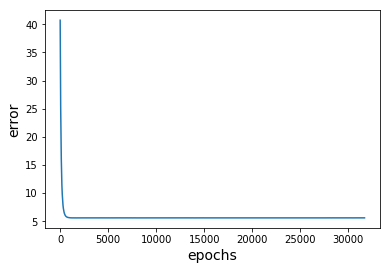

In [28]:
def minibatch_gd(nepochs,lr,n,w=None,isgivenW=False): #tính trên từng "nhúm" nhỏ dữ liệu trong mỗi lần lặp
                                                      #"nhúm" này nên trong khoảng từ 50 đến 100
    x,y = training_att,training_label
    if (not isgivenW):
        w = np.random.randn(13,1)
    lstloss = []
    for epoch in range(nepochs):
        np.random.shuffle(x)
        for i in range(epoch+n-1):
            xi = x[i]+1
            yi = y[i]+1
            dw = ((xi**2)*w)-(xi*yi) / training.shape[0]
            w = w - lr*dw
            y_predict3 = x.dot(w)
            error = np.abs(y - y_predict3).sum() / training.shape[0]
            lstloss.append(error)
            print("{}------{}".format(epoch,error))
    return w, lstloss
w, lstloss = minibatch_gd(200,0.005,60, w, False)
plt.plot(lstloss)
plt.xlabel('epochs',fontsize = 14)
plt.ylabel('error',fontsize = 14)

In [29]:
y_predict3 = validating_att.dot(w)
error = np.abs(validating_label - y_predict3).sum() / validating.shape[0]
error

5.862290848193578

In [30]:
y_predict3 = testing_att.dot(w)
error = np.abs(testing_label - y_predict3).sum() / testing.shape[0]
error

5.914191794927395